In [1]:
# importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import re
import langdetect
import matplotlib
from statistics import median
import statistics
from sklearn import preprocessing
from collections import Counter
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings

warnings.filterwarnings('ignore')

le = preprocessing.LabelEncoder()

# reading files

airbnb_listings = pd.read_csv(r"C:\Users\Dell\Desktop\data\airbnb_listings.csv")
airbnb_calendar = pd.read_csv(r"C:\Users\Dell\Desktop\data\calendar.csv")
airbnb_reviews = pd.read_csv(r"C:\Users\Dell\Desktop\data\reviews.csv")

low_memory = False    # error preventing

In [2]:
# DATA PREPROCESSING: TASK PART 1

# checking details about the given data
# starting with airbnb_listings

airbnb_listings.shape
airbnb_listings.info()
airbnb_listings.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22555 entries, 0 to 22554
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        22552 non-null  float64
 1   id                                22553 non-null  object 
 2   name                              22494 non-null  object 
 3   summary                           21589 non-null  object 
 4   description                       22351 non-null  object 
 5   host_id                           22554 non-null  object 
 6   host_name                         22528 non-null  object 
 7   host_since                        22528 non-null  object 
 8   host_about                        11190 non-null  object 
 9   host_response_time                9659 non-null   object 
 10  host_response_rate                9658 non-null   object 
 11  host_acceptance_rate              2 non-null      object 
 12  host

,Unnamed: 0,bathrooms,bedrooms,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,22552.000000,22519.000000,22533.000000,22551.000000,2.255100e+04,22551.000000,22551.000000,22551.000000,22551.000000,18133.000000,18120.000000,18114.000000,22549.000000,18635.000000
mean,11275.500000,1.093876,1.217636,7.157244,1.030550e+05,4.944703,11.144739,20.012062,79.847679,9.729719,9.504592,9.411174,1.918356,1.135387
std,6510.345971,0.375471,7.579693,40.665842,9.640733e+06,8.677642,17.520982,28.346543,119.370497,0.692701,0.767195,0.841479,3.667485,1.507069
min,0.000000,0.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,0.580000,2.000000,1.000000,0.010000
25%,5637.750000,1.000000,1.000000,2.000000,2.000000e+01,0.000000,0.000000,0.000000,0.000000,10.000000,9.000000,9.000000,1.000000,0.180000
50%,11275.500000,1.000000,1.000000,2.000000,1.124000e+03,0.000000,0.000000,0.000000,4.000000,10.000000,10.000000,10.000000,1.000000,0.540000
75%,16913.250000,1.000000,1.000000,4.000000,1.125000e+03,6.000000,18.000000,36.000000,129.000000,10.000000,10.000000,10.000000,1.000000,1.500000
max,22551.000000,28.000000,1125.000000,5000.000000,1.000000e+09,30.000000,60.000000,90.000000,365.000000,10.000000,10.000000,10.000000,45.000000,36.670000


In [3]:
# deleting unnecessary columns and columns that do not provide any crucial information for analysis in order to have less 
# unused data to deal with


del airbnb_listings["id"]
del airbnb_listings["host_name"]
del airbnb_listings["host_since"]
del airbnb_listings["host_about"]
del airbnb_listings["summary"]
del airbnb_listings["description"]
del airbnb_listings["amenities"]
del airbnb_listings["host_has_profile_pic"]
del airbnb_listings["require_guest_profile_picture"]    
del airbnb_listings["require_guest_phone_verification"]  
del airbnb_listings["calendar_updated"] 

In [4]:
# checking the values in airbnb_listings["city"] and airbnb_listings["market"] 

airbnb_listings["city"].unique()

array(['Berlin', 'Schöneberg', 'Berlin (Kreuzberg)', 'Friedrichshain',
       'Berlin / Kleinmachnow', 'Berlin-Wedding', 'Mitte', 'Berlin-Mitte',
       'Berlin-Schöneberg', 'Weissensee, Berlin', 'Woltersdorf',
       'Berlin-Treptow', 'Berlin Mitte', 'Kleinmachnow',
       'Berlin-Friedrichshain', 'Baseler Straße 91 A, 12205 Berlin ',
       'Berlin-Neukölln', 'Berlin-Zehlendorf',
       'Baseler Straße 91 A,12205 Berlin', 'Βερολίνο', 'Berlin ',
       'Berlin-Rudow (Neukölln)', 'Berlin-Tiergarten',
       'Kreuzberg, Berlin', 'Berlino', 'Berlin-Kreuzberg', 'Berlín',
       'Berlin - Schöneberg', 'Берлин', 'Berlim', '柏林', 'Berlin Neukölln',
       'Berlin/Steglitz', 'Berlin - Mitte', 'Prenzlauer Berg',
       'Berlin, friedrichshain ', 'Berlin- Charlottenburg', nan,
       'Berlin-Wilmersdorf', 'Wannsee', 'Berlin, Schöneberg', 'berlin',
       'Berlin (Wedding)', 'Mitte/Tiergarten', 'Köpenick',
       'Mitte/Kreuzberg', 'Berlin Friedrichshain',
       'SavignyPlatz (Charlottenburg)', 

In [5]:
airbnb_listings["market"].unique()

array(['Berlin', 'Zurich', 'Leipzig', 'Other (International)', 'New York',
       nan, 'Juarez', '1'], dtype=object)

In [6]:
# it can be noticed that airbnb_listings["city"] needs to be cleaned due to data anomalies
# converting anything that contains 'Berlin' or 'berlin', for example, '10999 Berlin' only to Berlin

new_city = np.where(airbnb_listings["city"].str.contains("[Bb]erlin"),
                   "Berlin",
                   airbnb_listings["city"])

airbnb_listings["city"] = new_city

In [7]:
# converthing other 'bad' data

new_city = np.where((airbnb_listings["city"].str.contains("1.0")) | (airbnb_listings["city"].str.contains("Βερολίνο")) 
                    | (airbnb_listings["city"].str.contains("Βερολίνο")) | (airbnb_listings["city"].str.contains("1.5"))
                    | (airbnb_listings["city"].str.contains("Berlín"))| (airbnb_listings["city"].str.contains("Берлин"))
                    | (airbnb_listings["city"].str.contains("Berlim")) | (airbnb_listings["city"].str.contains("柏林")),
                   "Berlin",
                   airbnb_listings["city"])

airbnb_listings["city"] = new_city

In [8]:
airbnb_listings["city"].unique() # checking the results

array(['Berlin', 'Schöneberg', 'Friedrichshain', 'Mitte', 'Woltersdorf',
       'Kleinmachnow', 'Prenzlauer Berg', 'Wannsee', 'Mitte/Tiergarten',
       'Köpenick', 'Mitte/Kreuzberg', 'SavignyPlatz (Charlottenburg)',
       '\nKreuzberg', 'Potsdam', 'Gosen-Neu Zittau', '1', 'Erkner',
       'Hoppegarten', '.', '*', 'Glienicke/Nordbahn', 'Hennigsdorf',
       'Weissensee'], dtype=object)

In [9]:
# deleting 'bad' data in 'market'

new_market = np.where((airbnb_listings["market"].str.contains("1.0")) | (airbnb_listings["market"].str.contains("2.0")),
                   "Berlin",
                   airbnb_listings["market"])

airbnb_listings["market"] = new_market

airbnb_listings["market"].fillna('Berlin', inplace = True) # solving NaN values

In [10]:
airbnb_listings["market"].unique() # checking the results

array(['Berlin', 'Zurich', 'Leipzig', 'Other (International)', 'New York',
       'Juarez', '1'], dtype=object)

In [11]:
airbnb_listings.isnull().sum() # checking columns with most NaN values 

Unnamed: 0                            3
name                                 61
host_id                               1
host_response_time                12896
host_response_rate                12897
host_acceptance_rate              22553
host_is_superhost                    30
host_identity_verified               30
neighbourhood                      1135
neighbourhood_group_cleansed          4
city                                  0
zipcode                             660
market                                0
latitude                              4
longitude                             4
property_type                         6
room_type                             4
accommodates                          4
bathrooms                            36
bedrooms                             22
beds                                 44
price                                 4
weekly_price                      18872
security_deposit                   9365
cleaning_fee                       7150


In [12]:
# it can be noticed that host_acceptance_rate has only 3 values which are not NaN, therefore this column can be dropped

del airbnb_listings["host_acceptance_rate"]

# we can notice that we have neighbourhood and neighbourhood_group_cleansed, therefore, we can drop 'neighbourhood' column

del airbnb_listings["neighbourhood"]

# it can be noticed that weekly_price also has a lot of NaN values, and those prices can be calculated from other variables
# if needed, therefore, we can drop it

del airbnb_listings["weekly_price"]

In [13]:
# changing NaN values with 0, where there are many of NaNs and where values are numerical, to assure that these values will not 
# interrupt further analysis

airbnb_listings["host_response_time"].fillna(0, inplace = True)
airbnb_listings["host_response_rate"].fillna(0, inplace = True)
airbnb_listings["availability_365"].fillna(0, inplace = True)
airbnb_listings["availability_90"].fillna(0, inplace = True)
airbnb_listings["availability_60"].fillna(0, inplace = True)
airbnb_listings["availability_30"].fillna(0, inplace = True)
airbnb_listings["neighbourhood_group_cleansed"].fillna(0, inplace = True) 
airbnb_listings["zipcode"].fillna(0, inplace = True)
airbnb_listings["latitude"].fillna(0, inplace = True)
airbnb_listings["longitude"].fillna(0, inplace = True)
airbnb_listings["property_type"].fillna(0, inplace = True)
airbnb_listings["room_type"].fillna(0, inplace = True)
airbnb_listings["accommodates"].fillna(0, inplace = True)
airbnb_listings["bathrooms"].fillna(0, inplace = True)
airbnb_listings["bedrooms"].fillna(0, inplace = True)
airbnb_listings["beds"].fillna(0, inplace = True)
airbnb_listings["has_availability"].fillna(0, inplace = True)
airbnb_listings["minimum_nights"].fillna(0, inplace = True)
airbnb_listings["maximum_nights"].fillna(0, inplace = True)
airbnb_listings["number_of_reviews"].fillna(0, inplace = True)
airbnb_listings["cancellation_policy"].fillna(0, inplace = True)
airbnb_listings["calculated_host_listings_count"].fillna(0, inplace = True)
airbnb_listings["name"].fillna(0, inplace = True)
airbnb_listings["host_is_superhost"].fillna(0, inplace = True)
airbnb_listings["host_identity_verified"].fillna(0, inplace = True)
airbnb_listings["instant_bookable"].fillna(0, inplace = True)
airbnb_listings["is_business_travel_ready"].fillna(0, inplace = True)

airbnb_listings["latitude"] = airbnb_listings["price"].replace('[\$\,\.]',"", regex = True).astype(float)
airbnb_listings["longitude"] = airbnb_listings["price"].replace('[\$\,\.]',"", regex = True).astype(float)

In [14]:
# changing NaN values with 0, where there are many of NaNs and where values are not numerical, to assure that 
# these values will not interrupt further analysis

new_name = np.where(airbnb_listings["name"].isnull == True,
                   "-",
                   airbnb_listings["name"])

airbnb_listings["name"] = new_name

new_superhost = np.where(airbnb_listings["host_is_superhost"].isnull == True,
                   "f",
                   airbnb_listings["host_is_superhost"])

airbnb_listings["host_is_superhost"] = new_superhost

new_id = np.where(airbnb_listings["host_identity_verified"].isnull == True,
                   "f",
                   airbnb_listings["host_identity_verified"])

airbnb_listings["host_identity_verified"] = new_id

new_avail = np.where(airbnb_listings["has_availability"].isnull == True,
                   "f",
                   airbnb_listings["has_availability"])

airbnb_listings["has_availability"] = new_avail

new_book = np.where(airbnb_listings["instant_bookable"].isnull == True,
                   "f",
                   airbnb_listings["instant_bookable"])

airbnb_listings["instant_bookable"] = new_book

new_tr = np.where(airbnb_listings["is_business_travel_ready"].isnull == True,
                   "f",
                   airbnb_listings["is_business_travel_ready"])

airbnb_listings["is_business_travel_ready"] = new_tr


new_ng =  np.where((airbnb_listings["neighbourhood_group_cleansed"].str.contains("1")) 
                   | (airbnb_listings["neighbourhood_group_cleansed"].str.contains("2")),
                   "Mitte",
                   airbnb_listings["neighbourhood_group_cleansed"])

airbnb_listings["neighbourhood_group_cleansed"] = new_ng

new_room =  np.where((airbnb_listings["room_type"].str.contains("150"))
                     | (airbnb_listings["room_type"].str.contains("300"))
                     | (airbnb_listings["room_type"].str.contains("0.00")),
                   "Entire home/apt",
                   airbnb_listings["room_type"])

airbnb_listings["room_type"] = new_room

airbnb_listings["review_scores_rating"] = airbnb_listings["review_scores_rating"].replace("f",'0', regex = True).astype(float)
airbnb_listings["review_scores_accuracy"] = airbnb_listings["review_scores_accuracy"].replace("moderate",'0', regex = True).replace("strict_14_with_grace_period",'0', regex = True).astype(float)
airbnb_listings["review_scores_cleanliness"] = airbnb_listings["review_scores_cleanliness"].replace("f",'0', regex = True).astype(float)
airbnb_listings["review_scores_checkin"] = airbnb_listings["review_scores_checkin"].replace("f",'0', regex = True).astype(float)
airbnb_listings["review_scores_communication"] = airbnb_listings["review_scores_communication"].astype(float)
airbnb_listings["review_scores_location"] = airbnb_listings["review_scores_location"].astype(float)
airbnb_listings["review_scores_value"] = airbnb_listings["review_scores_value"].astype(float)
airbnb_listings["reviews_per_month"] = airbnb_listings["reviews_per_month"].astype(float)

In [15]:
airbnb_listings["neighbourhood_group_cleansed"].unique() # mostly needed later, therefore explored in more detail

array(['Mitte', 'Pankow', 'Tempelhof - Schöneberg',
       'Friedrichshain-Kreuzberg', 'Neukölln', 'Charlottenburg-Wilm.',
       'Treptow - Köpenick', 'Steglitz - Zehlendorf', 'Reinickendorf',
       'Lichtenberg', 'Marzahn - Hellersdorf', 'Spandau', 0], dtype=object)

In [16]:
airbnb_listings["room_type"].unique() # mostly needed later, therefore explored in more detail

array(['Entire home/apt', 'Private room', 'Shared room', 0], dtype=object)

In [17]:
airbnb_listings["price"].unique() # mostly needed later, therefore explored in more detail

array(['$60.00 ', '$17.00 ', '$90.00 ', '$26.00 ', '$42.00 ', '$180.00 ',
       '$70.00 ', '$120.00 ', '$45.00 ', '$49.00 ', '$129.00 ', '$98.00 ',
       '$160.00 ', '$65.00 ', '$197.00 ', '$130.00 ', '$100.00 ',
       '$44.00 ', '$62.00 ', '$55.00 ', '$40.00 ', '$25.00 ', '$52.00 ',
       '$39.00 ', '$80.00 ', '$50.00 ', '$43.00 ', '$36.00 ', '$119.00 ',
       '$56.00 ', '$48.00 ', '$88.00 ', '$200.00 ', '$37.00 ', '$102.00 ',
       '$29.00 ', '$84.00 ', '$69.00 ', '$185.00 ', '$155.00 ', '$66.00 ',
       '$53.00 ', '$92.00 ', '$75.00 ', '$114.00 ', '$506.00 ', '$82.00 ',
       '$68.00 ', '$125.00 ', '$89.00 ', '$59.00 ', '$96.00 ', '$31.00 ',
       '$81.00 ', '$161.00 ', '$30.00 ', '$23.00 ', '$35.00 ', '$76.00 ',
       '$46.00 ', '$296.00 ', '$244.00 ', '$20.00 ', '$170.00 ',
       '$64.00 ', '$375.00 ', '$32.00 ', '$86.00 ', '$79.00 ', '$38.00 ',
       '$74.00 ', '$195.00 ', '$150.00 ', '$165.00 ', '$51.00 ',
       '$110.00 ', '$95.00 ', '$28.00 ', '$85.00 ', '$58.00 '

In [18]:
# when talking about price, security_deposit, cleaning_fee, review_scores_rating, review_scores_accuracy,
# review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, 
# review_scores_value, reviews_per_month, perhaps it is better idea to change NaN values with mean values
# we can check if mean is fine by making histogram for each of these
# values must be converted to numerical ones for plotting
# also, some variables need to be changed, for example, security_deposit contains '$' sign and is object type which can be
# checked by running airbnb_listings["security_deposit"].head(10)

airbnb_listings["security_deposit"] = airbnb_listings["security_deposit"].replace('[\$\,\.]',"", regex = True).astype(float)
airbnb_listings["price"] = airbnb_listings["price"].replace('[\$\,\.]',"", regex = True).astype(float)
airbnb_listings["cleaning_fee"] = airbnb_listings["cleaning_fee"].replace('[\$\,\.]',"", regex = True).astype(float)

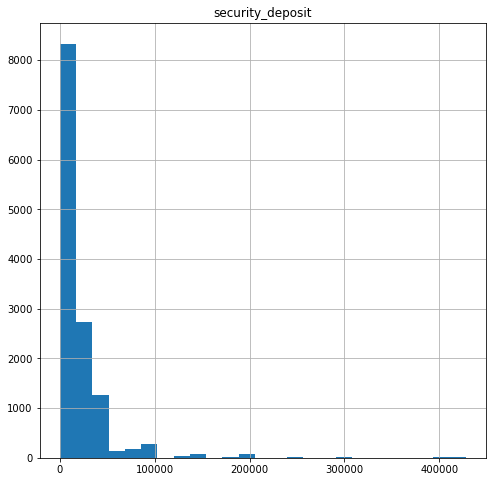

In [19]:
airbnb_listings.hist(column = "security_deposit", 
                     figsize = (8,8),
                     bins = 25);

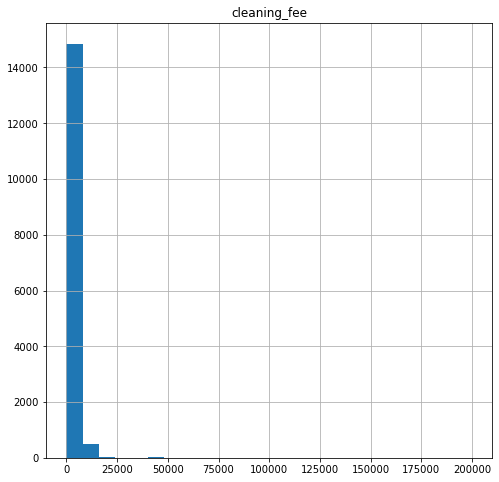

In [20]:
airbnb_listings.hist(column = "cleaning_fee", 
                     figsize = (8,8),
                     bins = 25);

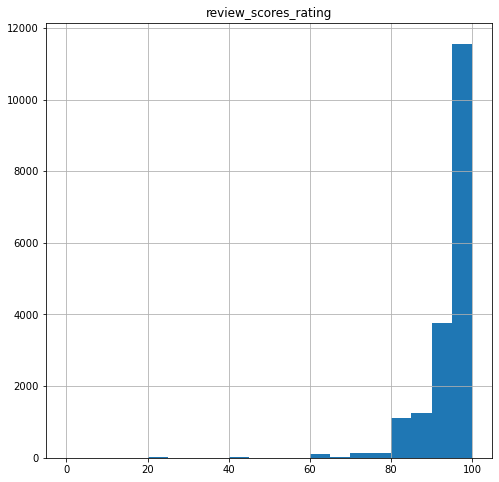

In [21]:
airbnb_listings.hist(column = "review_scores_rating", 
                     figsize = (8,8),
                     bins = 20);

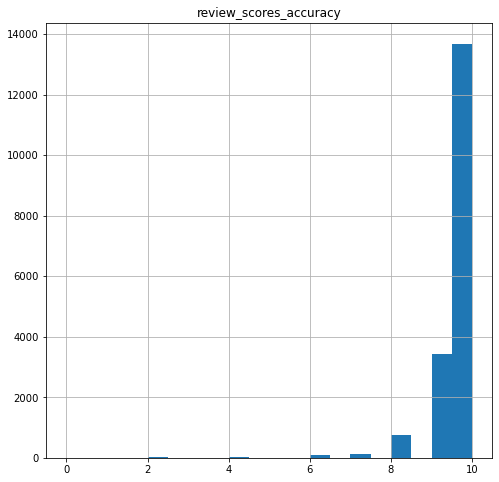

In [22]:
airbnb_listings.hist(column = "review_scores_accuracy", 
                     figsize = (8,8),
                     bins = 20);

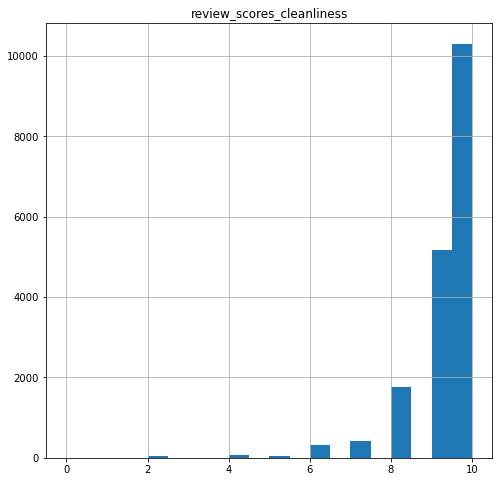

In [23]:
airbnb_listings.hist(column = "review_scores_cleanliness", 
                     figsize = (8,8),
                     bins = 20);

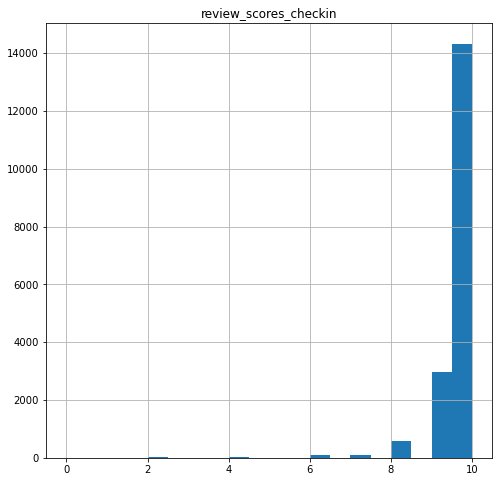

In [24]:
airbnb_listings.hist(column = "review_scores_checkin", 
                     figsize = (8,8),
                     bins = 20);

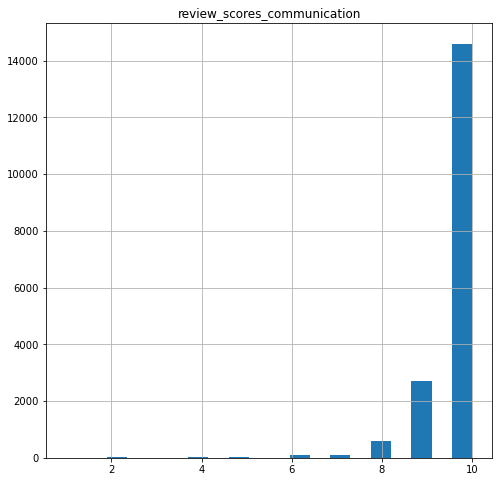

In [25]:
airbnb_listings.hist(column = "review_scores_communication", 
                     figsize = (8,8),
                     bins = 20);

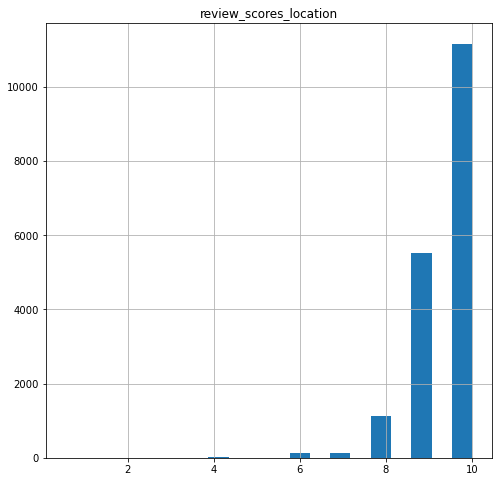

In [26]:
airbnb_listings.hist(column = "review_scores_location", 
                     figsize = (8,8),
                     bins = 20);

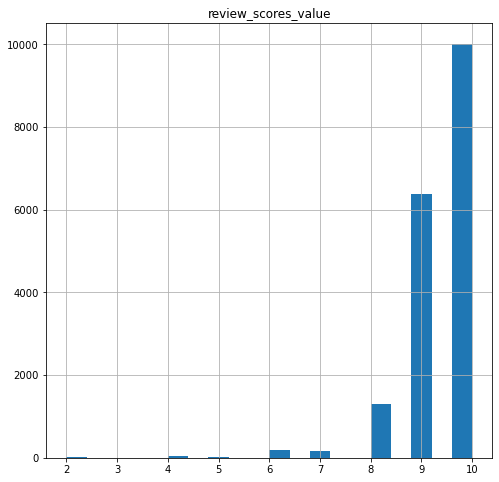

In [27]:
airbnb_listings.hist(column = "review_scores_value", 
                     figsize = (8,8),
                     bins = 20);

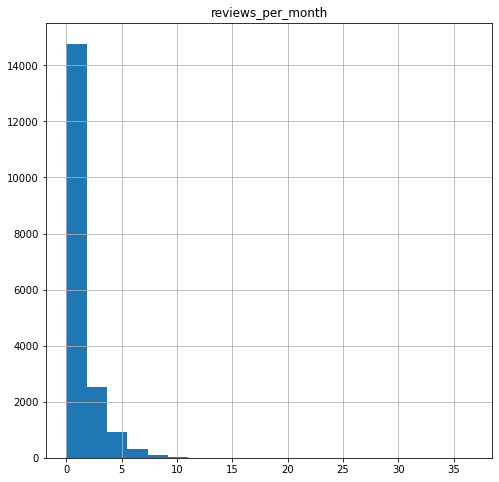

In [28]:
airbnb_listings.hist(column = "reviews_per_month", 
                     figsize = (8,8),
                     bins = 20);

In [29]:
# setting medians instead of NaNs, since they're mostly bigger than means and in our case, seen in histograms, it is better
# to take something bigger than mean/average

airbnb_listings["security_deposit"] = le.fit_transform(airbnb_listings["security_deposit"].astype(float))

newdata = np.where(airbnb_listings["security_deposit"].isnull(),
                 statistics.median(airbnb_listings["security_deposit"]),
                           airbnb_listings["security_deposit"])



airbnb_listings["security_deposit"] = newdata

airbnb_listings["cleaning_fee"] = le.fit_transform(airbnb_listings["cleaning_fee"].astype(float))

newdata = np.where(airbnb_listings["cleaning_fee"].isnull(),
                 statistics.median(airbnb_listings["cleaning_fee"]),
                           airbnb_listings["cleaning_fee"])



airbnb_listings["cleaning_fee"] = newdata

airbnb_listings["review_scores_rating"] = le.fit_transform(airbnb_listings["review_scores_rating"].replace("f",'0',
                                                                                       regex = True).astype(float))

newdata = np.where(airbnb_listings["review_scores_rating"].isnull(),
                 statistics.median(airbnb_listings["review_scores_rating"]),
                           airbnb_listings["review_scores_rating"])


airbnb_listings["review_scores_rating"] = newdata

airbnb_listings["review_scores_accuracy"] = le.fit_transform(airbnb_listings["review_scores_accuracy"].replace("moderate",'0', regex = True).replace("strict_14_with_grace_period",'0', regex = True).astype(float))

newdata = np.where(airbnb_listings["review_scores_accuracy"].isnull(),
                 statistics.median(airbnb_listings["review_scores_accuracy"]),
                           airbnb_listings["review_scores_accuracy"])

airbnb_listings["review_scores_accuracy"] = newdata

airbnb_listings["review_scores_cleanliness"] = le.fit_transform(airbnb_listings["review_scores_cleanliness"].replace("f",'0',
                                                                                       regex = True).astype(float))

newdata = np.where(airbnb_listings["review_scores_cleanliness"].isnull(),
                 statistics.median(airbnb_listings["review_scores_cleanliness"]),
                           airbnb_listings["review_scores_cleanliness"])


airbnb_listings["review_scores_cleanliness"] = newdata

airbnb_listings["review_scores_checkin"] = le.fit_transform(airbnb_listings["review_scores_checkin"].replace("f",'0',
                                                                                       regex = True).astype(float))

newdata = np.where(airbnb_listings["review_scores_checkin"].isnull(),
                 statistics.median(airbnb_listings["review_scores_checkin"]),
                           airbnb_listings["review_scores_checkin"])

airbnb_listings["review_scores_checkin"] = newdata

airbnb_listings["review_scores_communication"] = le.fit_transform(airbnb_listings["review_scores_communication"].astype(float))

newdata = np.where(airbnb_listings["review_scores_communication"].isnull(),
                 statistics.median(airbnb_listings["review_scores_communication"]),
                           airbnb_listings["review_scores_communication"])



airbnb_listings["review_scores_communication"] = newdata

airbnb_listings["review_scores_location"] = le.fit_transform(airbnb_listings["review_scores_location"].astype(float))

newdata = np.where(airbnb_listings["review_scores_location"].isnull(),
                 statistics.median(airbnb_listings["review_scores_location"]),
                           airbnb_listings["review_scores_location"])


airbnb_listings["review_scores_location"] = newdata

airbnb_listings["review_scores_value"] = le.fit_transform(airbnb_listings["review_scores_value"].astype(float))

newdata = np.where(airbnb_listings["review_scores_value"].isnull(),
                 statistics.median(airbnb_listings["review_scores_value"]),
                           airbnb_listings["review_scores_value"])


airbnb_listings["review_scores_value"] = newdata

airbnb_listings["reviews_per_month"] = le.fit_transform(airbnb_listings["reviews_per_month"].astype(float))

newdata = np.where(airbnb_listings["reviews_per_month"].isnull(),
                 statistics.median(airbnb_listings["reviews_per_month"]),
                           airbnb_listings["reviews_per_month"])


airbnb_listings["reviews_per_month"] = newdata

airbnb_listings["number_of_reviews"] = le.fit_transform(airbnb_listings["number_of_reviews"].replace("f",'0',
                                                                                       regex = True).astype(float))

newdata = np.where(airbnb_listings["number_of_reviews"].isnull(),
                 statistics.median(airbnb_listings["number_of_reviews"]),
                           airbnb_listings["number_of_reviews"])


airbnb_listings["number_of_reviews"] = newdata
airbnb_listings["price"].fillna(0, inplace = True)

In [30]:
airbnb_listings.isnull().sum() # checking columns with most NaN values after cleaning

Unnamed: 0                        3
name                              0
host_id                           1
host_response_time                0
host_response_rate                0
host_is_superhost                 0
host_identity_verified            0
neighbourhood_group_cleansed      0
city                              0
zipcode                           0
market                            0
latitude                          4
longitude                         4
property_type                     0
room_type                         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
price                             0
security_deposit                  0
cleaning_fee                      0
minimum_nights                    0
maximum_nights                    0
has_availability                  0
availability_30                   0
availability_60                   0
availability_90             

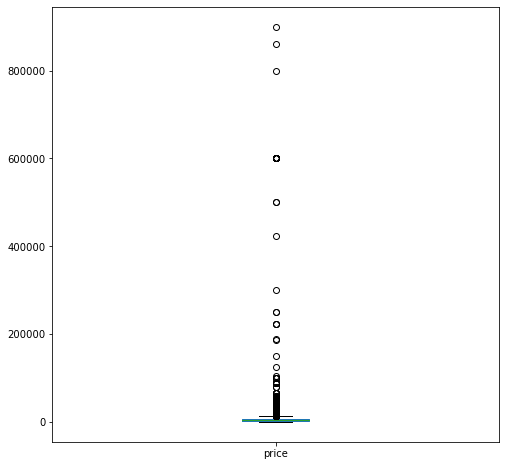

In [31]:
# checking potential outlier values (extreme data points)
# 1st in 'price'

airbnb_listings["price"].plot(kind="box", 
                               figsize = (8,8))

# it can be seen that there are certain extreme values, we'll try to locate them

index = np.where(airbnb_listings["price"] == max(airbnb_listings["price"]))

airbnb_listings.loc[index]

# considering that outliers can make huge impact on investigating anything with 'price', these values should be smaller
# 6 big outliers can be seen in boxplot that should be changed 

newdata = np.where(airbnb_listings["price"] > 70000,
                           70000,
                           airbnb_listings["price"])


airbnb_listings["price"] = newdata

<AxesSubplot:>

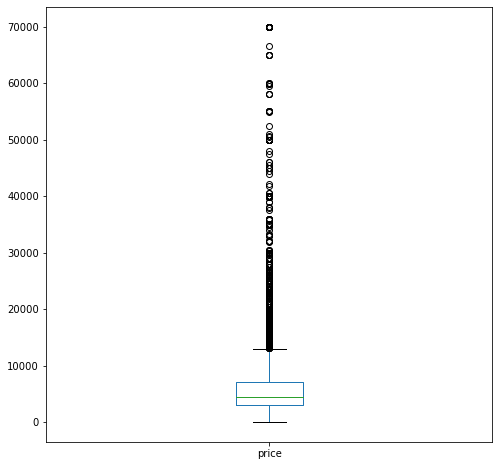

In [32]:
airbnb_listings["price"].plot(kind="box", 
                               figsize = (8,8))  # checking results

<AxesSubplot:>

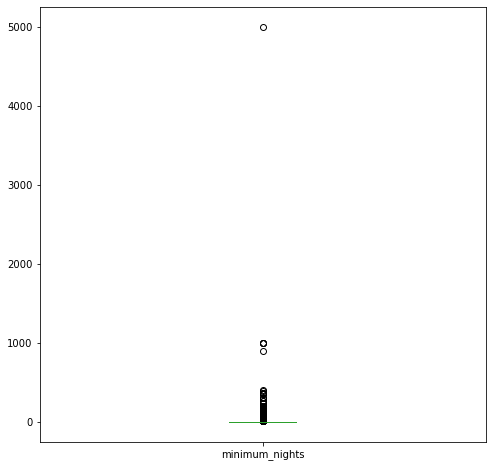

In [33]:
airbnb_listings["minimum_nights"].plot(kind="box", 
                               figsize = (8,8))

<AxesSubplot:>

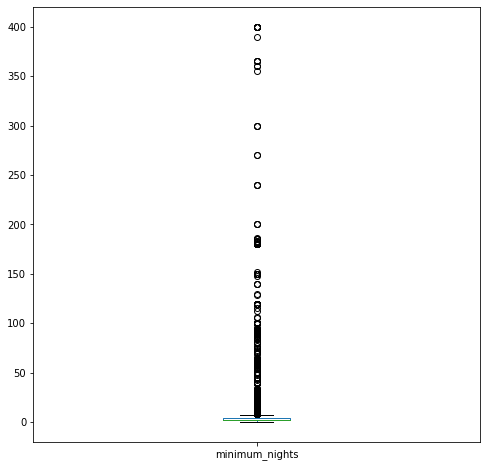

In [34]:
newdata = np.where(airbnb_listings["minimum_nights"] > 400,
                           400,
                           airbnb_listings["minimum_nights"])


airbnb_listings["minimum_nights"] = newdata

airbnb_listings["minimum_nights"].plot(kind="box", 
                               figsize = (8,8))

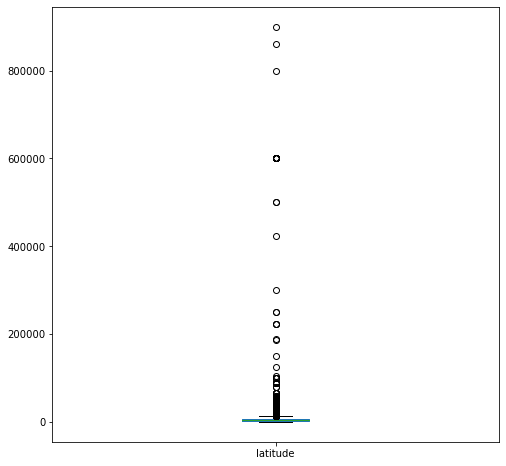

In [35]:
airbnb_listings["latitude"].plot(kind="box", 
                               figsize = (8,8))

newdata = np.where(airbnb_listings["latitude"] > 100000,
                           100000,
                           airbnb_listings["latitude"])


airbnb_listings["latitude"] = newdata

<AxesSubplot:>

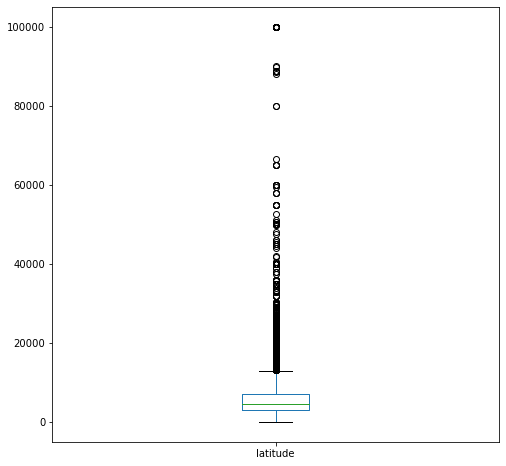

In [36]:
airbnb_listings["latitude"].plot(kind="box", 
                               figsize = (8,8))

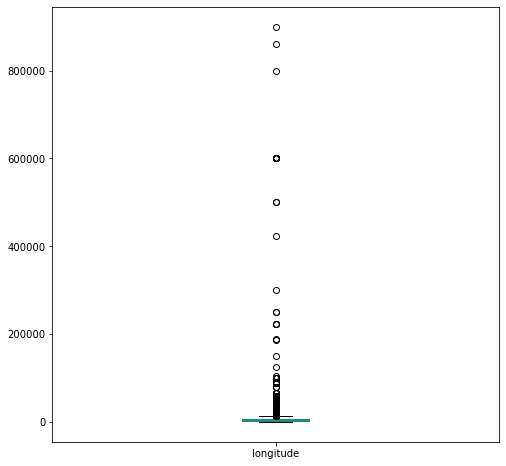

In [37]:
airbnb_listings["longitude"].plot(kind="box", 
                               figsize = (8,8))

newdata = np.where(airbnb_listings["longitude"] > 100000,
                           100000,
                           airbnb_listings["longitude"])


airbnb_listings["longitude"] = newdata

<AxesSubplot:>

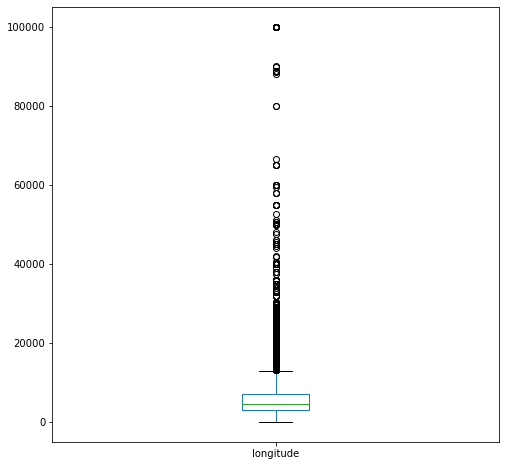

In [38]:
airbnb_listings["longitude"].plot(kind="box", 
                               figsize = (8,8))

In [39]:
sum(airbnb_listings.duplicated())  # checking for duplicate data

0

In [40]:
airbnb_listings.replace([np.inf, -np.inf], np.nan).dropna(axis=1) # removing potential infinite values

,name,host_response_time,host_response_rate,host_is_superhost,host_identity_verified,neighbourhood_group_cleansed,city,zipcode,market,property_type,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,calculated_host_listings_count,reviews_per_month
0,Berlin-Mitte Value! Quiet courtyard/very central,within an hour,96%,t,t,Mitte,Berlin,10119,Berlin,Guesthouse,...,8,8,9,9,7,f,f,strict_14_with_grace_period,4.0,375
1,Prenzlauer Berg close to Mauerpark,0,0,f,t,Pankow,Berlin,10437,Berlin,Apartment,...,9,8,9,9,8,f,f,flexible,1.0,141
2,Fabulous Flat in great Location,within a day,100%,f,t,Pankow,Berlin,10405,Berlin,Apartment,...,8,7,8,9,7,t,f,strict_14_with_grace_period,1.0,124
3,BerlinSpot Schöneberg near KaDeWe,0,0,f,t,Tempelhof - Schöneberg,Berlin,10777,Berlin,Apartment,...,8,7,9,8,7,f,f,strict_14_with_grace_period,1.0,38
4,BrightRoom with sunny greenview!,within an hour,100%,t,t,Pankow,Berlin,10437,Berlin,Apartment,...,9,8,9,9,7,f,f,moderate,1.0,174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22550,Cozy Apartment right in the center of Berlin,0,0,f,f,Mitte,Berlin,10119,Berlin,Apartment,...,91,527,1272,580,40,f,f,flexible,1.0,1781
22551,Altbau/ Schöneberger Kiez / Schlafsofa,within an hour,88%,f,f,Tempelhof - Schöneberg,Berlin,10777,Berlin,Apartment,...,59,526,1271,579,53,t,f,flexible,6.0,1782
22552,Artists loft with garden in the center of Berlin,0,0,f,t,Pankow,Berlin,10119,Berlin,Loft,...,45,525,1270,578,91,f,f,flexible,2.0,1783
22553,Room for two with private shower / WC,within a few hours,90%,f,f,Mitte,Berlin,10117,Berlin,Boutique hotel,...,1896,2289,1944,2231,2273,f,f,flexible,3.0,4352


In [41]:
# cleaning airbnb_calendar
# info about data

airbnb_calendar.shape
airbnb_calendar.info()
airbnb_calendar.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8231480 entries, 0 to 8231479
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   listing_id  int64 
 1   date        object
 2   available   object
 3   price       object
dtypes: int64(1), object(3)
memory usage: 251.2+ MB


,listing_id
count,8.231480e+06
mean,1.571560e+07
std,8.551880e+06
min,2.015000e+03
25%,8.065954e+06
50%,1.686638e+07
75%,2.258393e+07
max,2.986735e+07


In [42]:
del airbnb_calendar['listing_id']  # not usable
airbnb_calendar.isnull().sum()  # it can be noticed that not a single value for price exists, therefore we can drop that column

date               0
available          0
price        6430639
dtype: int64

In [43]:
del airbnb_calendar['price'] 
airbnb_calendar.isnull().sum() # checking the work

date         0
available    0
dtype: int64

In [44]:
# adding categorized values for column 'available' for better visualized and easier working (instead of t/f)

new_available = pd.Categorical(airbnb_calendar['available'])
new_available = new_available.rename_categories(['available','not available'])
airbnb_calendar['available'] = new_available

airbnb_calendar['available'].unique() # checking if done properly

['available', 'not available']
Categories (2, object): ['available', 'not available']

In [45]:
sum(airbnb_calendar.duplicated())  # checking duplicate work

8230746

In [46]:
airbnb_calendar.drop_duplicates(subset=None, keep=False, inplace=True)
sum(airbnb_calendar.duplicated())  # checking duplicate work

0

In [47]:
airbnb_calendar["date"].fillna("0/0/0", inplace = True)
airbnb_calendar["available"].fillna('not available', inplace = True)

In [48]:
# cleaning airbnb_reviews
# info about data

airbnb_reviews.shape
airbnb_reviews.info()
airbnb_reviews.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401963 entries, 0 to 401962
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     401963 non-null  int64 
 1   id             401963 non-null  int64 
 2   date           401963 non-null  object
 3   reviewer_id    401963 non-null  int64 
 4   reviewer_name  401963 non-null  object
 5   comments       401467 non-null  object
dtypes: int64(3), object(3)
memory usage: 18.4+ MB


,listing_id,id,reviewer_id
count,4.019630e+05,4.019630e+05,4.019630e+05
mean,1.027382e+07,1.773751e+08,5.915480e+07
std,8.097068e+06,1.020965e+08,5.634647e+07
min,2.015000e+03,4.283000e+03,5.000000e+00
25%,2.421223e+06,8.681566e+07,1.397606e+07
50%,9.085319e+06,1.796981e+08,3.839430e+07
75%,1.710636e+07,2.671094e+08,9.266236e+07
max,2.984956e+07,3.461331e+08,2.244757e+08


In [49]:
# deleting unnecessary columns

del airbnb_reviews['listing_id']
del airbnb_reviews['id']
del airbnb_reviews['reviewer_name']

In [50]:
airbnb_reviews.isnull().sum() # can edit comments since we have 496 NaN values

date             0
reviewer_id      0
comments       496
dtype: int64

In [51]:
airbnb_reviews.drop_duplicates(subset=None, keep=False, inplace=True)
sum(airbnb_reviews.duplicated())  # checking duplicate work

0

In [52]:
# editing NaN comments to '%' (random sign) in case if we want to get some keywords from comments later, we can exclude
# all that contain only '%'


newdata = np.where(airbnb_reviews["comments"].isnull(),
                                 '%',
                                  airbnb_reviews["comments"])

airbnb_reviews["comments"] = newdata

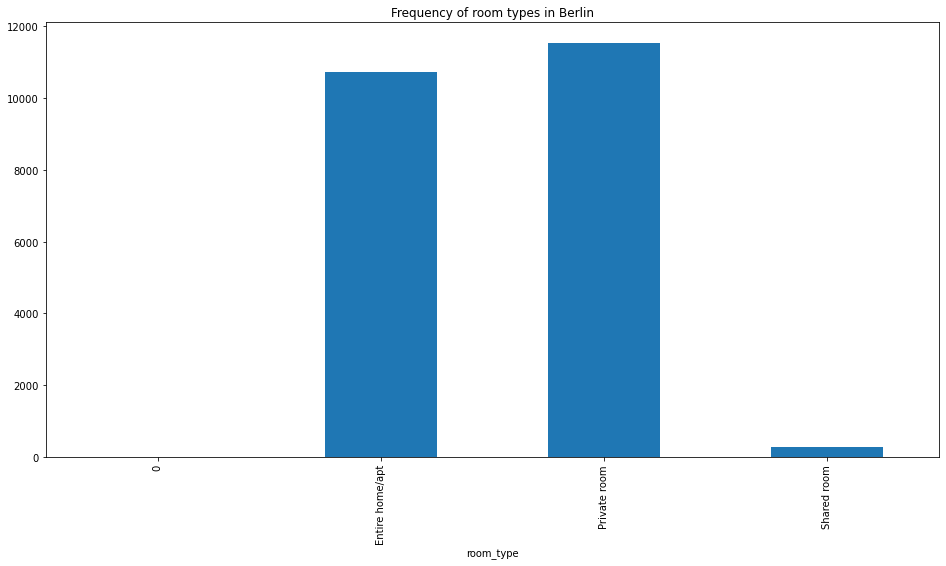

In [53]:
# EXPLORATORY DATA ANALYSIS: TASK PART 2

# showing room_type frequencies for better understanding of later room_type and price distribution

room_type = airbnb_listings.groupby('room_type').host_id.count()
room_type = room_type.reset_index()
room_type = room_type.rename(columns={'ID': 'Number of listings'})

objects = room_type['room_type']
y_pos = room_type['host_id']

room_type.plot.bar        (x = 'room_type',
                           y = 'host_id',
                          figsize = (16, 8),
                          title = 'Frequency of room types in Berlin',
                          legend = False)

# label naming

plt.xlabel = 'Room type'
plt.ylabel = 'Frequency'

# it can be seen that most frequent room types in Berlin are private rooms

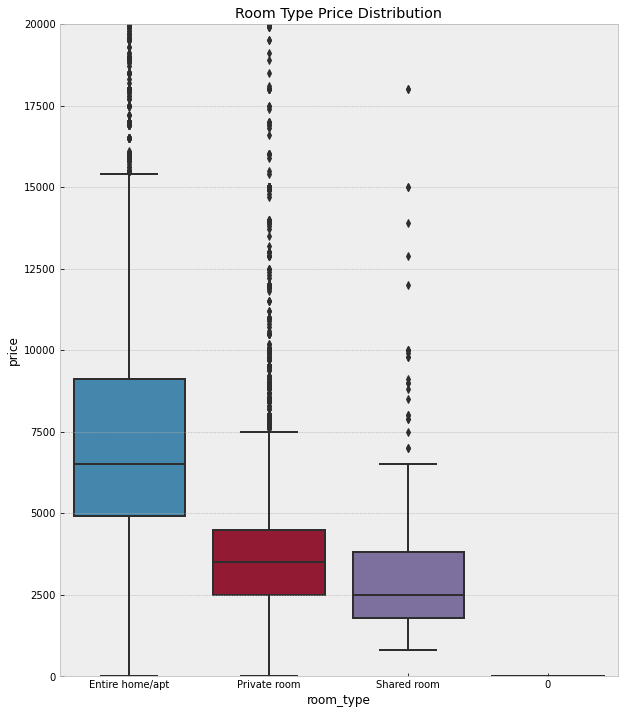

In [54]:
# distribution of prices and 'room_type'

plt.style.use('bmh')
plt.figure(figsize=(10,12))
sns.boxplot(y='price', x='room_type', data = airbnb_listings)
plt.title('Room Type Price Distribution')
plt.ylim((0,20000))
plt.show()

# from data below, it can be seen that Entire home/apt has the most expensive price per night with a median above $60

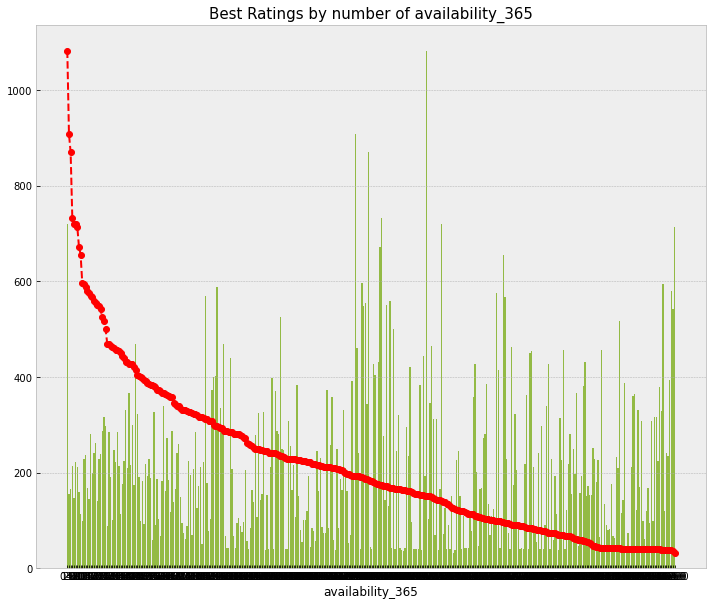

In [55]:
# finding relationship between other variables and 'availability_365'/'availability_30'
# availability = no of days the facility is available to be booked

# finding relationship between availability_365 and review_scores_rating

review = airbnb_listings.sort_values('review_scores_rating',ascending=False)
top_reviewed = review.loc[:,['availability_365','review_scores_rating']]
top_reviewed = top_reviewed.groupby('availability_365').mean().sort_values('review_scores_rating', ascending = False).reset_index()
fig1,ax1 = plt.subplots(figsize = (12,10))
sns.barplot(x=top_reviewed['availability_365'], y = top_reviewed['review_scores_rating'].values, color = 'yellowgreen', ax = ax1)
plt.plot(top_reviewed['review_scores_rating'], marker ='o', color ='red', linestyle = '--')


for ax in ax1.get_xticklabels():
    plt.title('Best Ratings by number of availability_365',fontsize = '15')
    
plt.show()
sns.set()


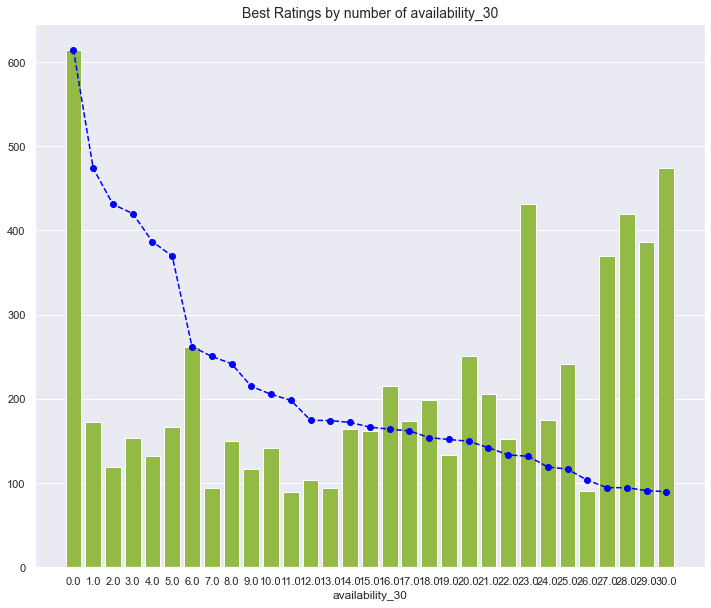

In [56]:
# finding relationship between availability_30 and review_scores_rating

review = airbnb_listings.sort_values('review_scores_rating', ascending = False)
top_reviewed = review.loc[:,['availability_30','review_scores_rating']]
top_reviewed = top_reviewed.groupby('availability_30').mean().sort_values('review_scores_rating',ascending=False).reset_index()
fig2,ax2 = plt.subplots(figsize=(12,10))
sns.barplot(x=top_reviewed['availability_30'],y = top_reviewed['review_scores_rating'].values, color = 'yellowgreen',ax = ax2)
plt.plot(top_reviewed['review_scores_rating'], marker = 'o', color = 'blue',linestyle = '--')

for ax in ax2.get_xticklabels():

    plt.title('Best Ratings by number of availability_30',fontsize='14')
    
plt.show()
sns.set()

(0.0, 100.0)

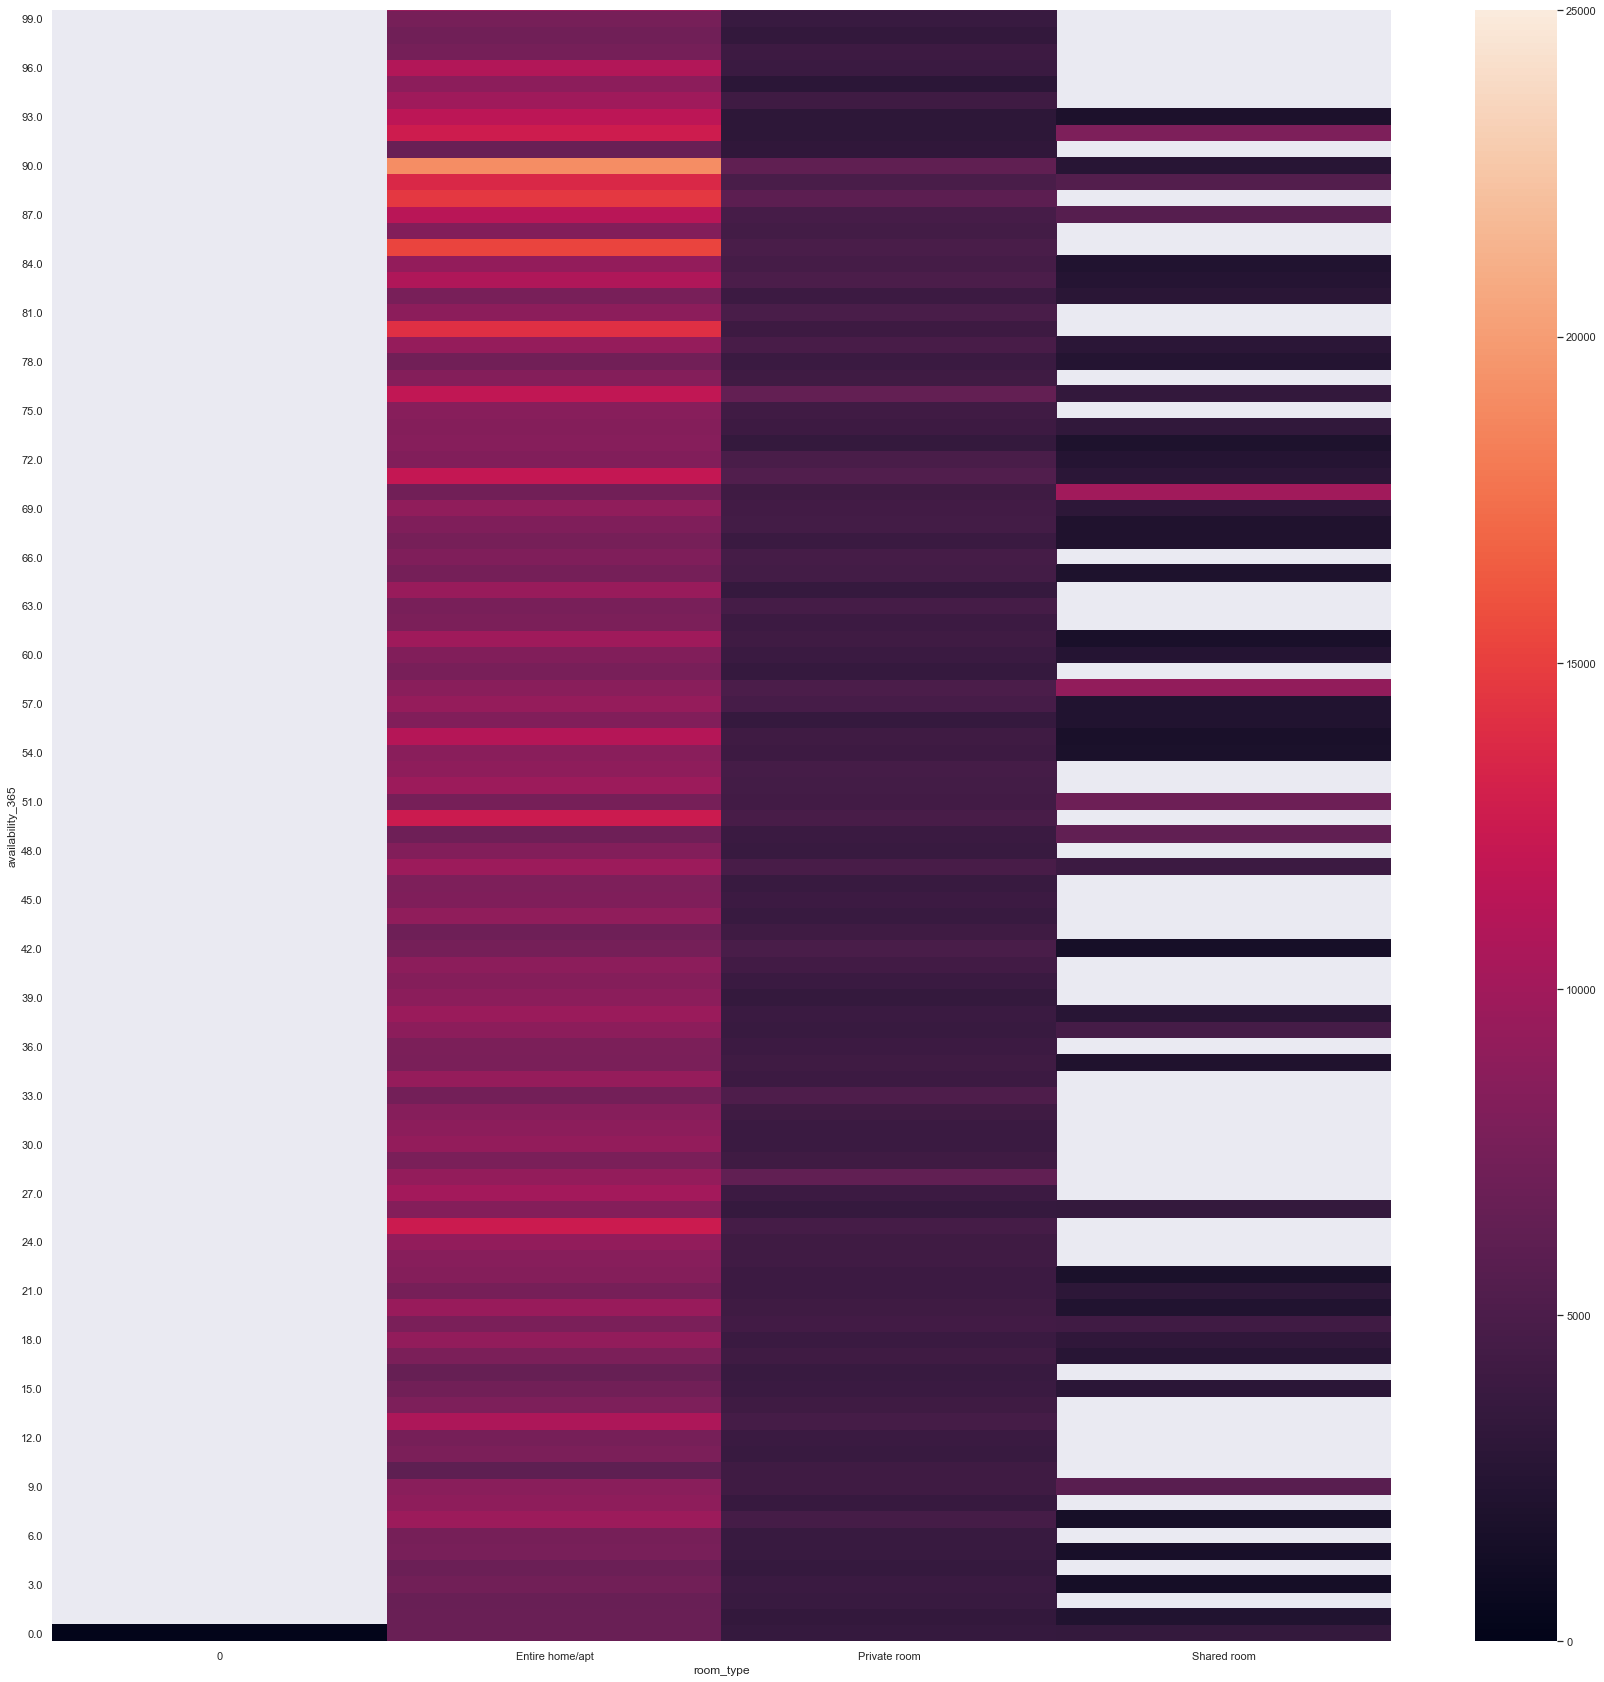

In [57]:
# since availability_x=0 means that it is all booked, it was logical outcome that 0 value has rating of all ranges
# and therefore the best ones in both figures
# however, in 1st figure (availability_365) it can be seen that best ratings/no of ratings appear in the middle
# this can be explained by seasonal availability, it is rare that people expect facility to work the whole season
# therefore, people choose and therefore rate places who have about half of the available capacities in a certain period
# still, when looking at the 2nd figure, situation is different: bigger no of ratings have bigger no of available facilities
# this can be explained by the small number (30) and in which case, the bigger no of available facilities is better and gives
# people more opportunities to choose between

# realtionship between availability_365 and room_type including price

plt.figure(figsize=(30,30))

sns.heatmap(airbnb_listings.groupby(['availability_365', 'room_type']).price.mean().unstack(), 
            annot=False, fmt='0.24f', vmin=0, vmax=25000)

plt.ylim(ymax = 100, ymin = 0)

(0.0, 15.0)

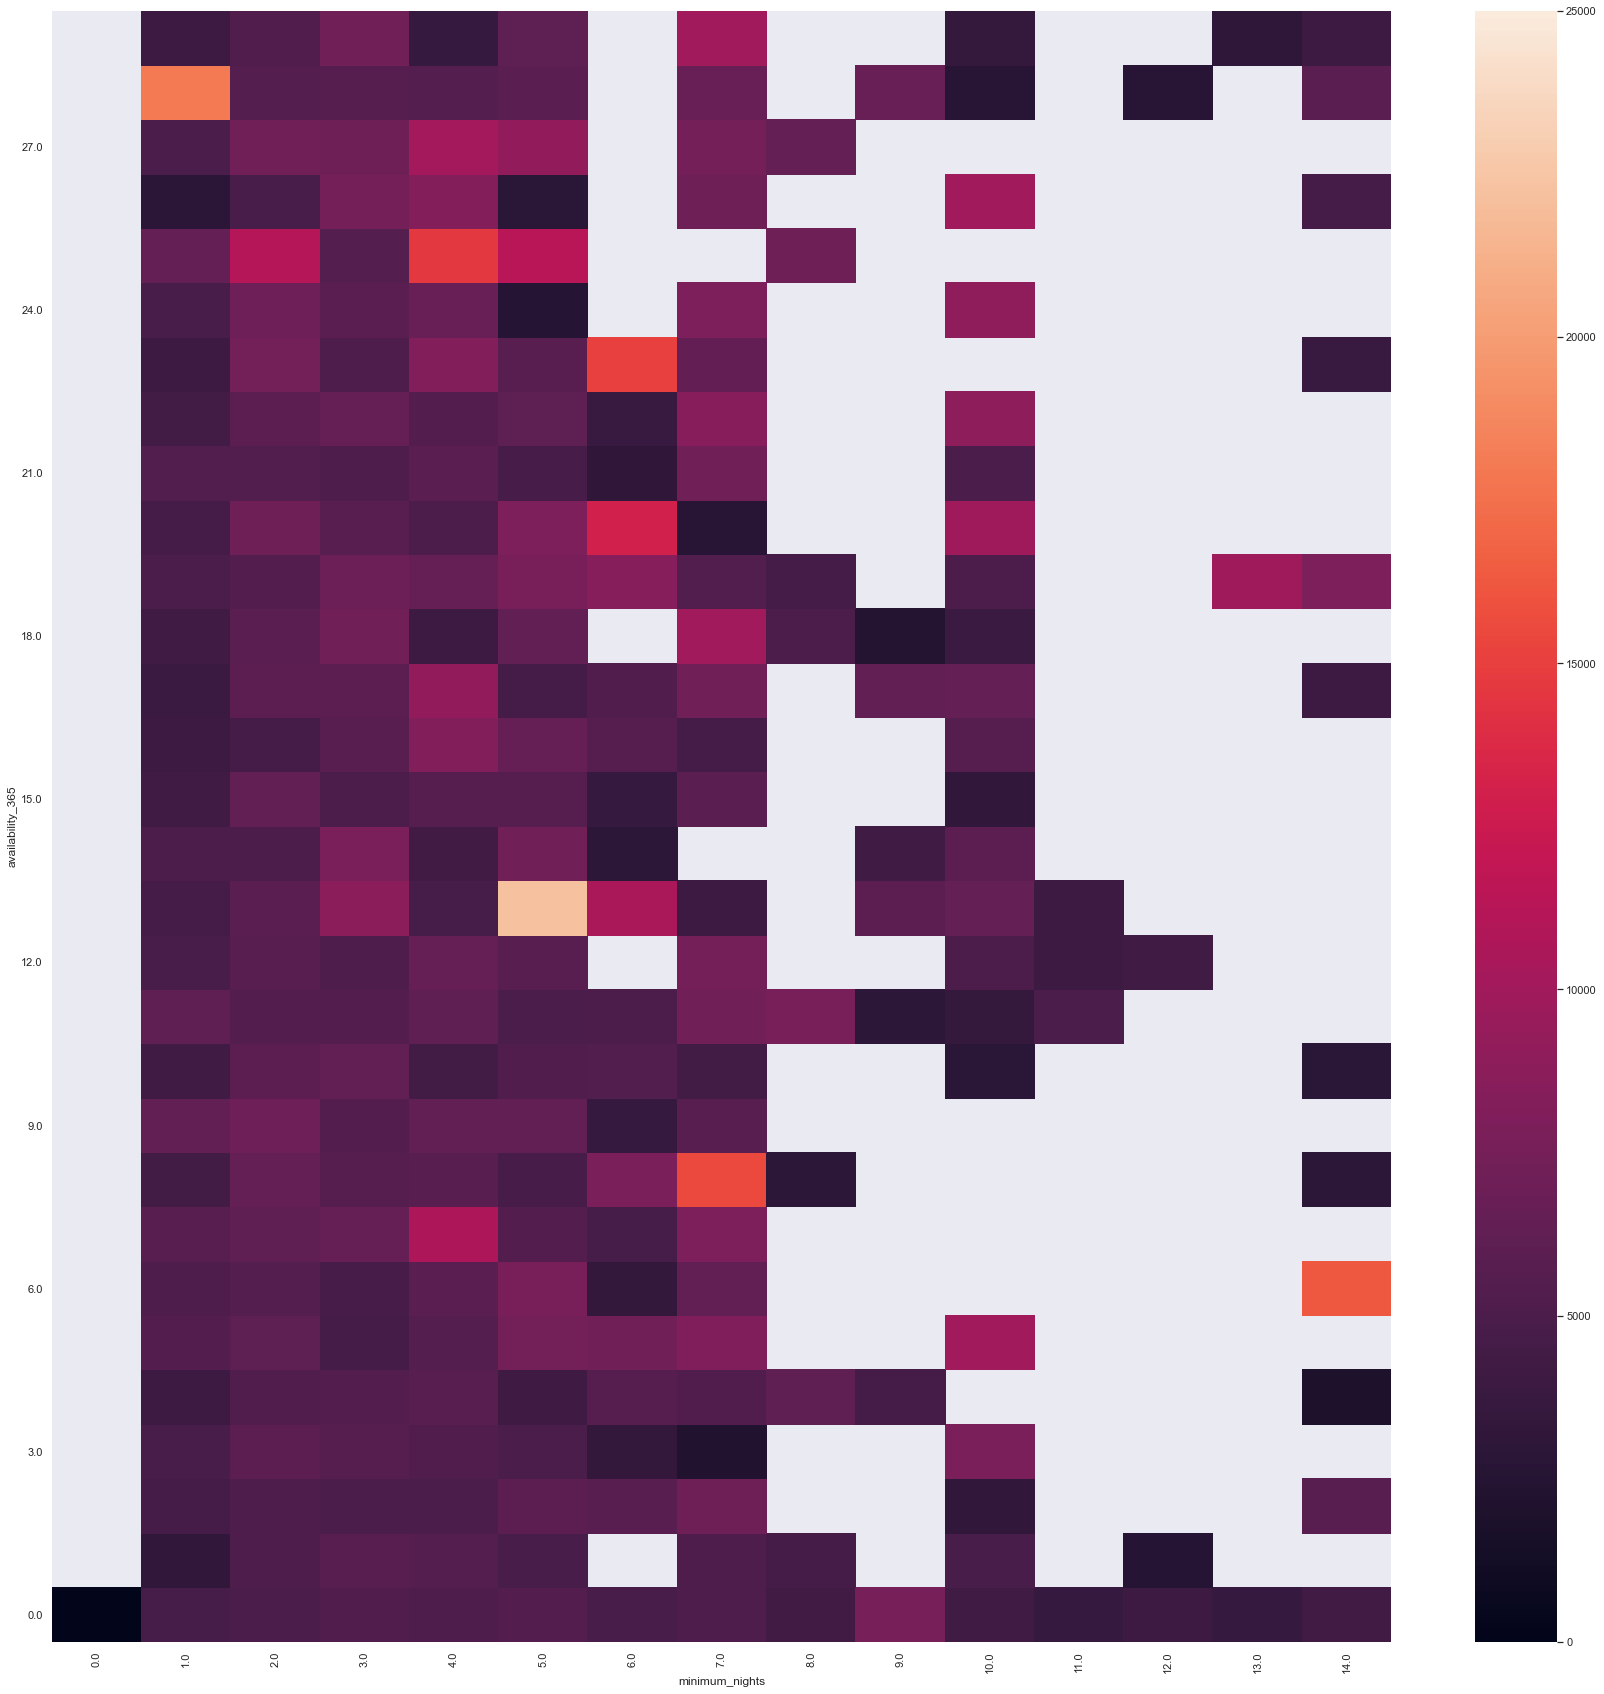

In [58]:
# realtionship between availability_365 and minimum_nights including price

plt.figure(figsize=(30,30))
sns.heatmap(airbnb_listings.groupby(['availability_365', 'minimum_nights']).price.mean().unstack(), 
            annot=False, fmt='0.24f', vmin=0, vmax=25000)

plt.ylim(ymax = 30, ymin = 0)
plt.xlim(xmax = 15, xmin = 0)

(0.0, 30.0)

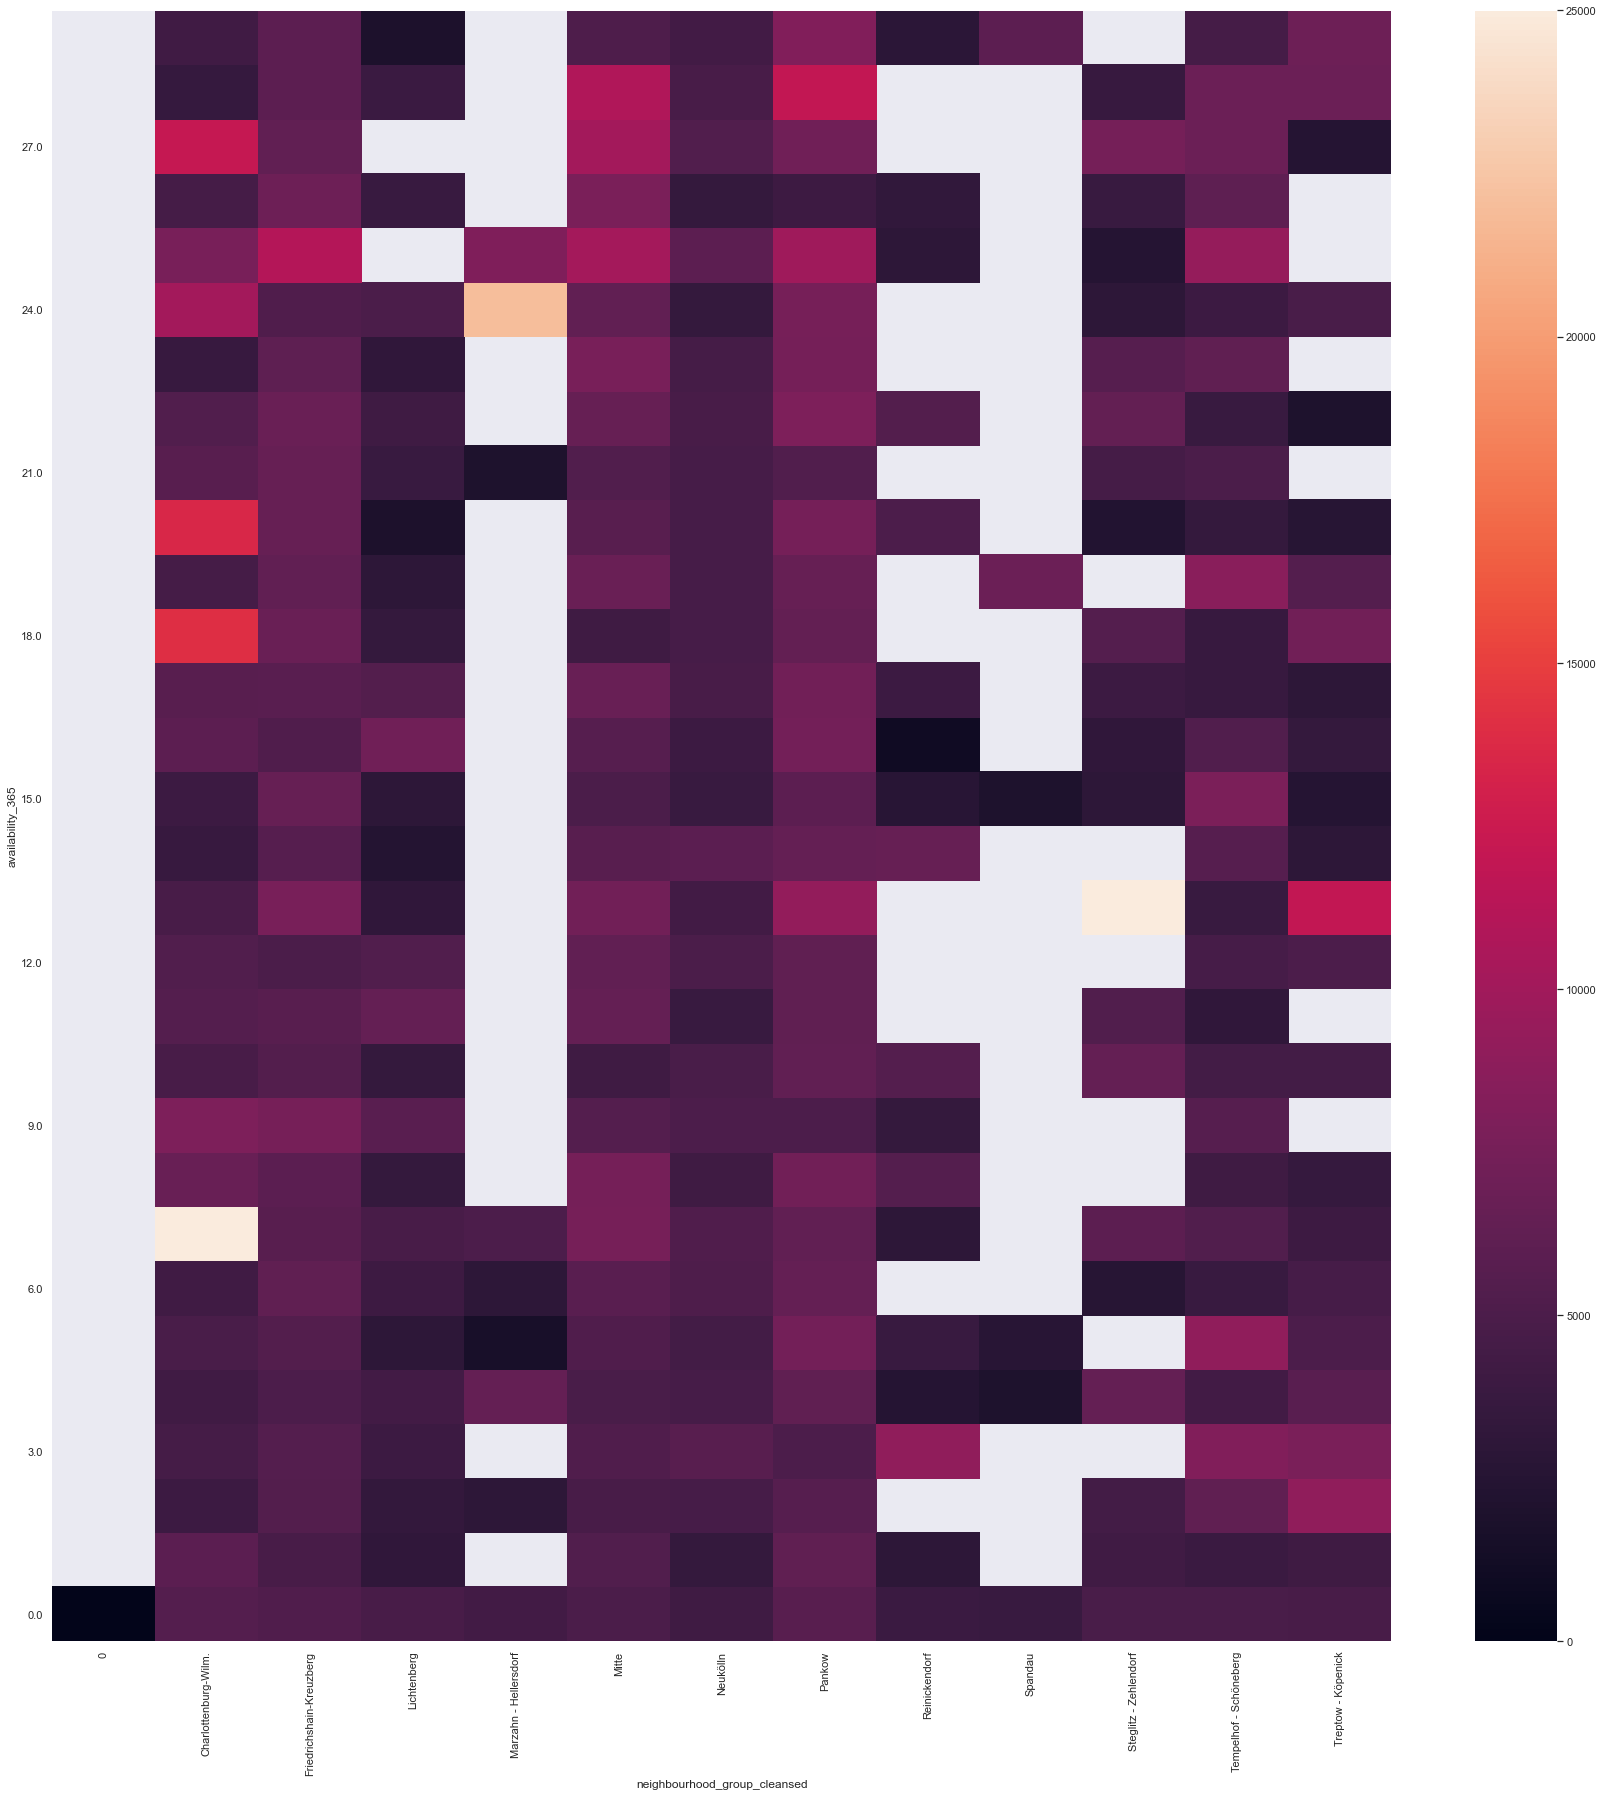

In [59]:
# realtionship between availability_365 and neighbourhood_group_cleansed including price

plt.figure(figsize=(30,30))
sns.heatmap(airbnb_listings.groupby(['availability_365', 'neighbourhood_group_cleansed']).price.mean().unstack(), 
            annot=False, fmt='0.24f', vmin=0, vmax=25000)

plt.ylim(ymax = 30, ymin = 0)

In [60]:
# questions I found interesting

# investigating property_type values

property_type = airbnb_listings.groupby('property_type').count()
property_type = property_type.reset_index()
property_type = property_type.rename(columns={'ID': 'Number of listings'})
property_type

,property_type,Unnamed: 0,name,host_id,host_response_time,host_response_rate,host_is_superhost,host_identity_verified,neighbourhood_group_cleansed,city,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,calculated_host_listings_count,reviews_per_month
0,0,3,6,5,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
1,Aparthotel,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
2,Apartment,20222,20222,20222,20222,20222,20222,20222,20222,20222,...,20222,20222,20222,20222,20222,20222,20222,20222,20222,20222
3,Barn,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,Bed and breakfast,64,64,64,64,64,64,64,64,64,...,64,64,64,64,64,64,64,64,64,64
5,Boat,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
6,Boutique hotel,43,43,43,43,43,43,43,43,43,...,43,43,43,43,43,43,43,43,43,43
7,Bungalow,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
8,Cabin,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
9,Camper/RV,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11


<AxesSubplot:title={'center':'Diagram of property types'}, ylabel='property_type'>

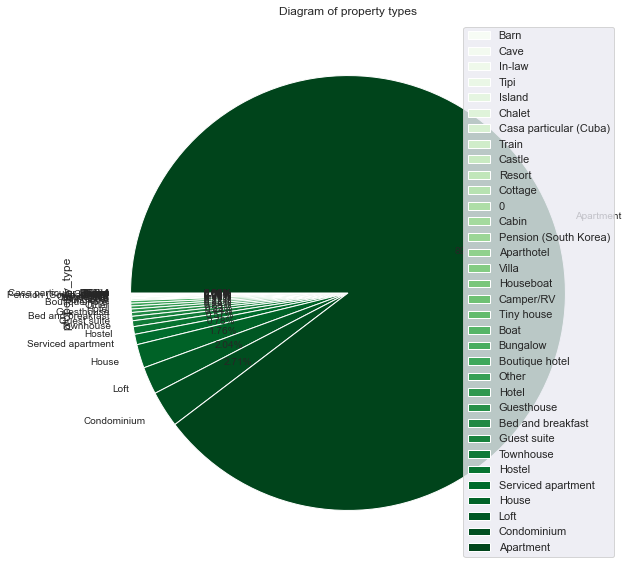

In [61]:
properties = airbnb_listings.property_type
p = Counter(properties)


newprop = pd.DataFrame.from_dict(p, orient = 'index').sort_values(by = 0)
newprop.columns = ['property_type']

# investigating what proportion of the rentals correspond to each room type

newprop.plot.pie(y = 'property_type', 
                 colormap = 'Greens',
                 figsize = (10, 10),
                 fontsize = 10, 
                 legend = True,
                 autopct = '%1.2f%%',
                 title = 'Diagram of property types',
                 startangle=180)

# from all rentals available in the dataset, 59.55% of them correspond to Entire-home apartments

In [62]:
# determining relation between property_type and room_type including mean price

room_property_df = airbnb_listings.groupby(['property_type', 'room_type']).price.mean()
room_property_df = room_property_df.reset_index()
room_property_df = room_property_df.sort_values('price', ascending=[0])
room_property_df

,property_type,room_type,price
38,Hotel,Private room,35298.000000
42,Houseboat,Entire home/apt,19460.000000
51,Other,Shared room,18000.000000
10,Boat,Entire home/apt,17681.250000
12,Boutique hotel,Private room,16527.906977
...,...,...,...
31,Guest suite,Shared room,1800.000000
9,Bed and breakfast,Shared room,1400.000000
34,Guesthouse,Shared room,900.000000
1,0,Entire home/apt,6.500000


In [63]:
# showing top 10 listings based on their number of reviews

new = airbnb_listings.nlargest(10, 'number_of_reviews') 

new 

,Unnamed: 0,name,host_id,host_response_time,host_response_rate,host_is_superhost,host_identity_verified,neighbourhood_group_cleansed,city,zipcode,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,calculated_host_listings_count,reviews_per_month
327,327.0,Lounge Room – Alex in 5 Min,286494,within an hour,97%,t,f,Pankow,Berlin,10405,...,8,7,8,9,7,f,f,strict_14_with_grace_period,3.0,610
487,487.0,Maritime Room - Alex in 5 Min,2547002,within an hour,100%,t,f,Pankow,Berlin,10405,...,8,7,8,8,7,f,f,strict_14_with_grace_period,2.0,603
606,606.0,Berlin Room Oriental Style P'Berg,286494,within an hour,97%,t,f,Pankow,Berlin,10405,...,8,7,8,8,7,f,f,strict_14_with_grace_period,3.0,594
90,90.0,Design Jewel in the midst of MITTE!,632174,0,0,t,t,Mitte,Berlin,10178,...,9,8,9,9,8,f,f,strict_14_with_grace_period,5.0,517
280,280.0,"Central, cosy and one-of-a-kind",1250154,within an hour,100%,t,f,Pankow,Berlin,10405,...,9,8,9,9,8,t,f,strict_14_with_grace_period,2.0,526
531,531.0,Mediterranean Room next to Center,2547002,within an hour,100%,t,f,Pankow,Berlin,10405,...,8,7,8,9,7,f,f,strict_14_with_grace_period,2.0,545
185,185.0,clean calm cosy central apartment,1146238,0,0,t,t,Mitte,Berlin,13353,...,9,8,9,8,8,t,f,flexible,2.0,477
2230,2230.0,"Central, cozy room at Alexanderplatz",17238564,within an hour,100%,f,f,Mitte,Berlin,10178,...,8,7,9,9,7,t,f,moderate,2.0,765
154,154.0,FILMSALON,868282,0,0,t,f,Friedrichshain-Kreuzberg,Berlin,10967,...,9,8,9,9,8,f,f,moderate,2.0,450
135,135.0,Cosy Studio with balcony in Mitte,98237,within an hour,100%,t,f,Mitte,Berlin,10115,...,8,8,9,9,7,t,f,strict_14_with_grace_period,3.0,445


In [64]:
# average price per night

price_avg = new.price.mean()/100

print('Average price per night: $ {}'.format(price_avg))

Average price per night: $ 57.0


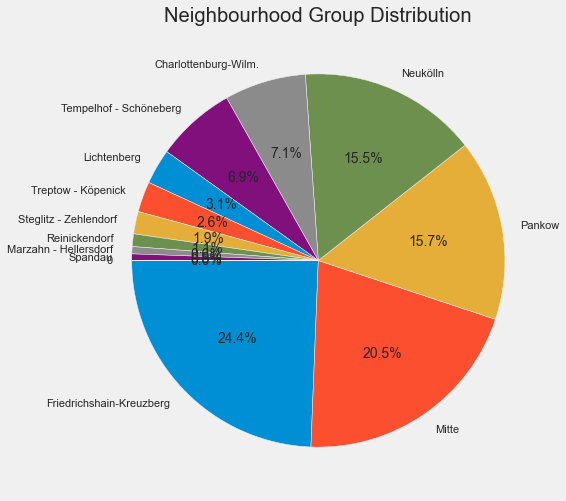

In [65]:
# investigating neighbourhood groups

plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,8))
plt.title("Neighbourhood Group Distribution")
g = plt.pie(airbnb_listings.neighbourhood_group_cleansed.value_counts(),
            labels=airbnb_listings.neighbourhood_group_cleansed.value_counts().index,
            autopct='%1.1f%%', 
            startangle=180)

plt.show()

In [66]:
# total number of reviews

total_reviews = new.number_of_reviews.sum()

print(total_reviews)

3005


Text(0.5, 1.0, 'Mean price of each neighbourhood group')

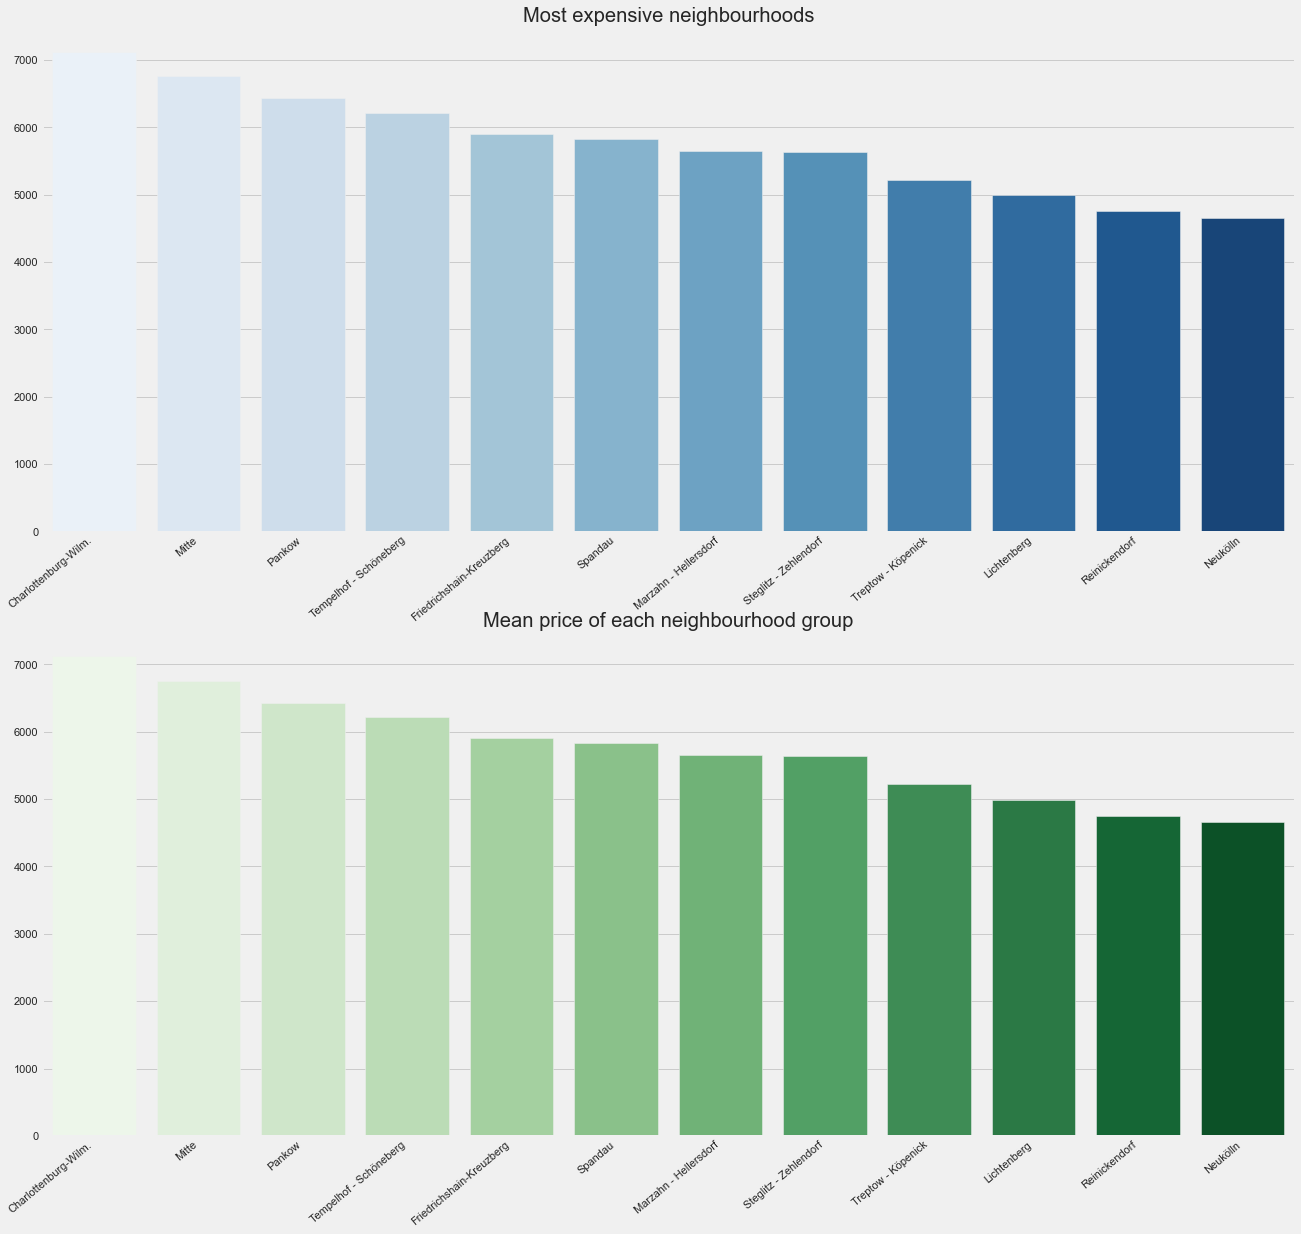

In [67]:
# finding most expensive neighbourhoods

d = airbnb_listings.groupby('neighbourhood_group_cleansed')['price'].mean().sort_values(ascending = False)[:12]

fig, ax= plt.subplots(2,1, figsize=(20,19))
sns.barplot(d.index.tolist()[:20], d.values[:20], ax=ax[0], palette=("Blues"))
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=40, ha="right")
ax[0].set_title('Most expensive neighbourhoods')

# finding mean price of each neighbourhood group

sns.barplot(d.index.tolist(), d.values, ax=ax[1], palette=("Greens"))
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=40, ha="right")
ax[1].set_title('Mean price of each neighbourhood group')

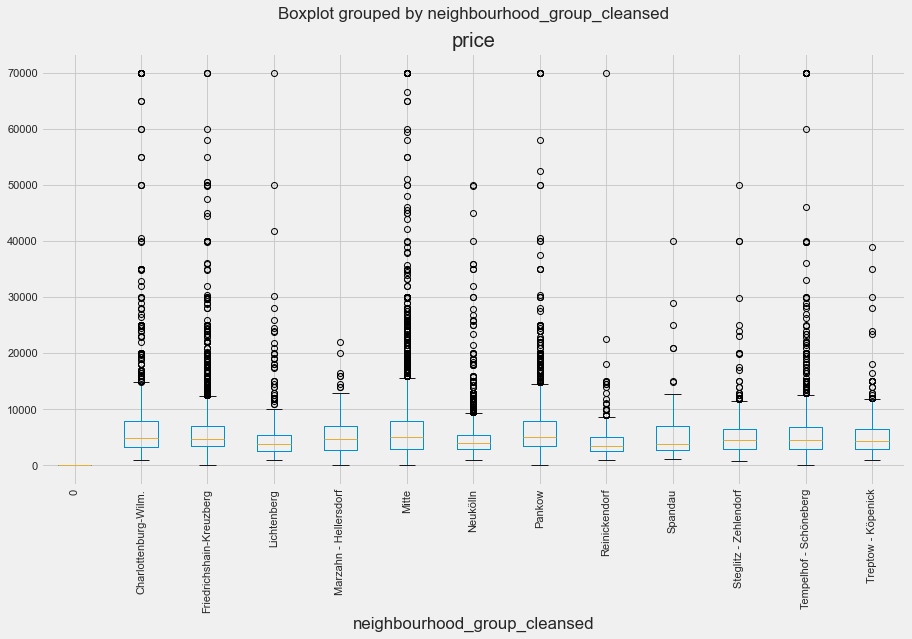

In [68]:
# neighborhoods and prices comparation

airbnb_listings.boxplot(column='price', by='neighbourhood_group_cleansed', figsize=(15,8), rot=90);

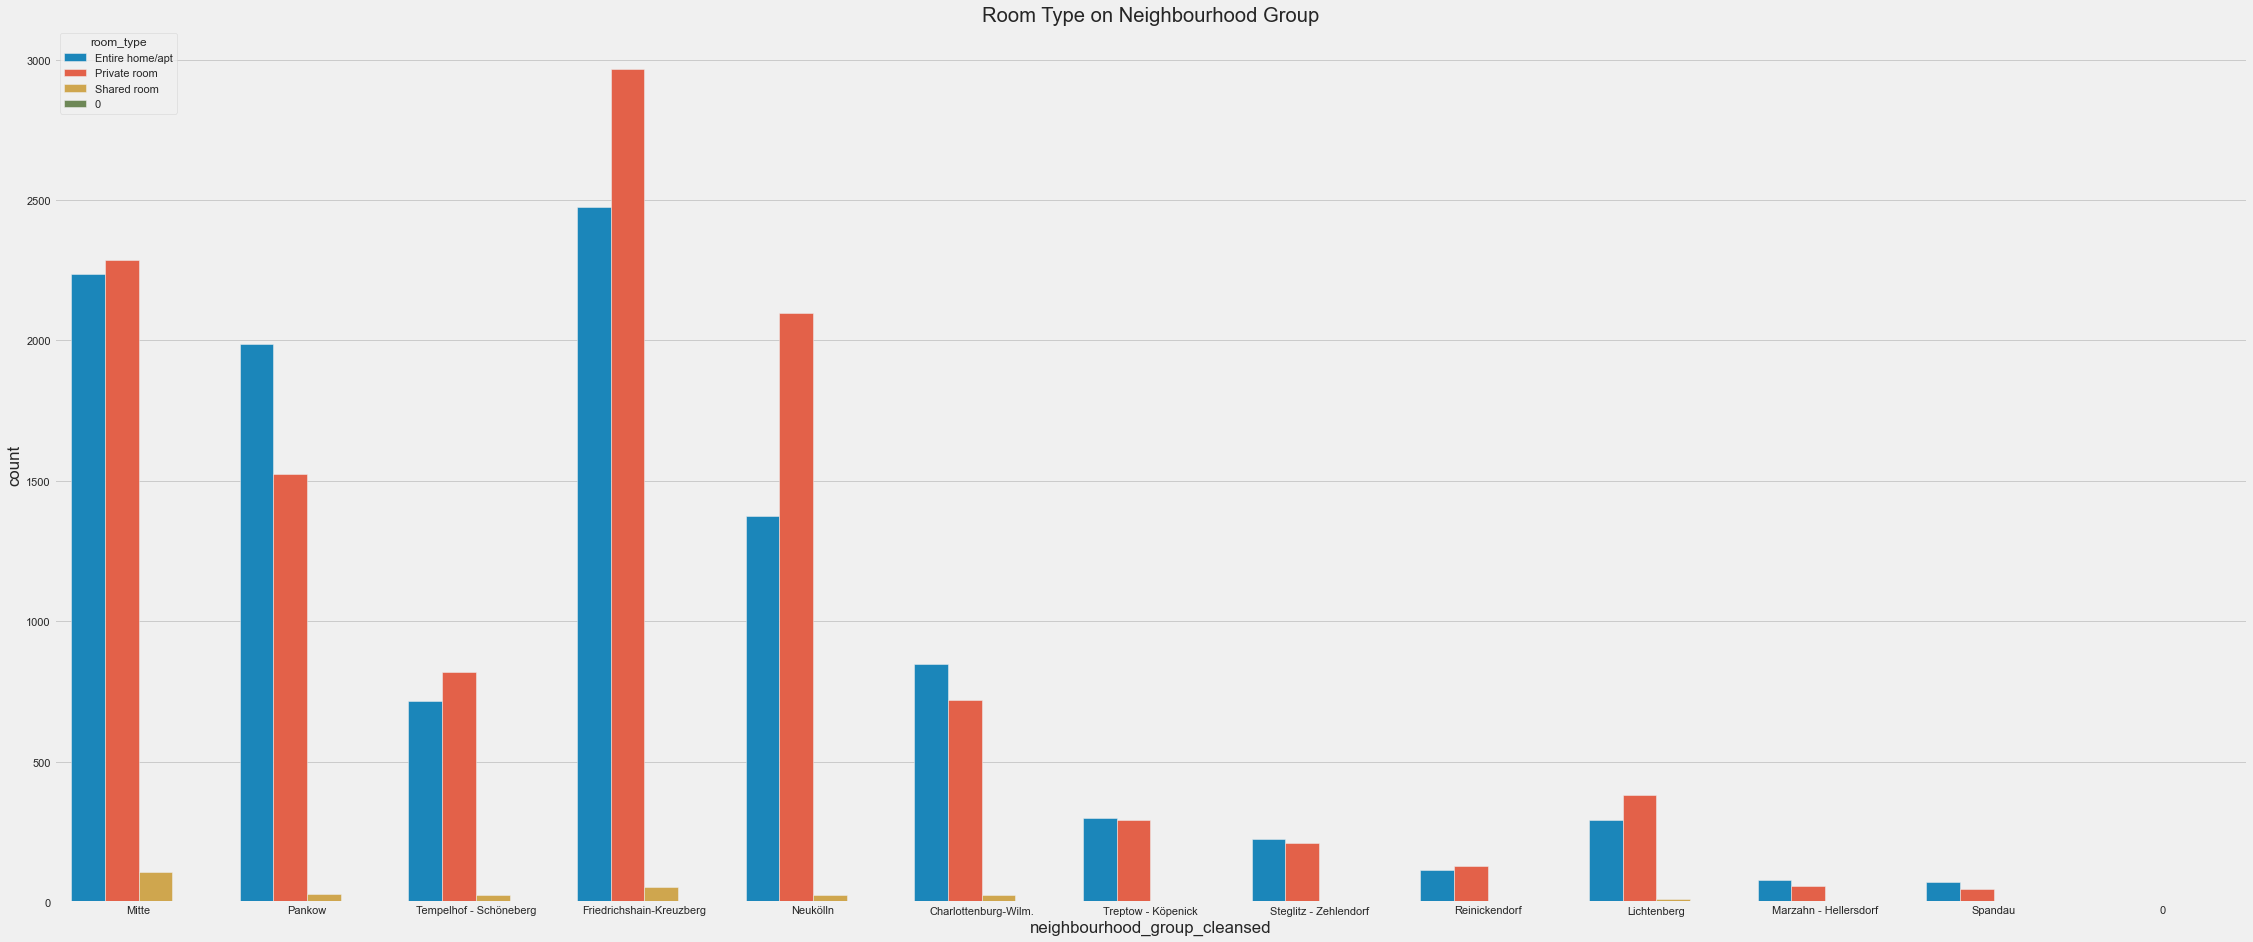

In [69]:
# dependance of room type on the neighbourhood group

plt.figure(figsize=(35,15))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(airbnb_listings.neighbourhood_group_cleansed, hue = airbnb_listings.room_type)
plt.show()

In [70]:
# dependance of prices on the number of nights

airbnb_listings['minimum_nights'].describe()

count    22555.000000
mean         6.823454
std         19.465942
min          0.000000
25%          2.000000
50%          2.000000
75%          4.000000
max        400.000000
Name: minimum_nights, dtype: float64

In [71]:
print(f'Mean of minimum_nights: {np.mean(airbnb_listings["minimum_nights"])}')

print(f"Mode of minimum_nights: {airbnb_listings[(airbnb_listings['minimum_nights'] <= 30) & (airbnb_listings['minimum_nights'] > 0)]['minimum_nights'].mode()[0]}")

Mean of minimum_nights: 6.823453779649745
Mode of minimum_nights: 2.0


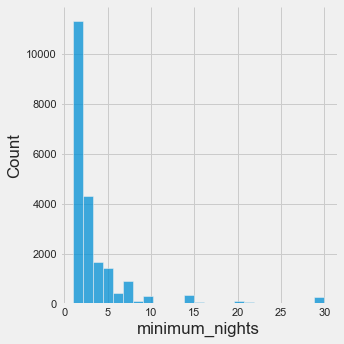

In [72]:
sns.displot(airbnb_listings[(airbnb_listings['minimum_nights'] <= 30) & (airbnb_listings['minimum_nights'] > 0)]
             ['minimum_nights'], 
             bins=25)

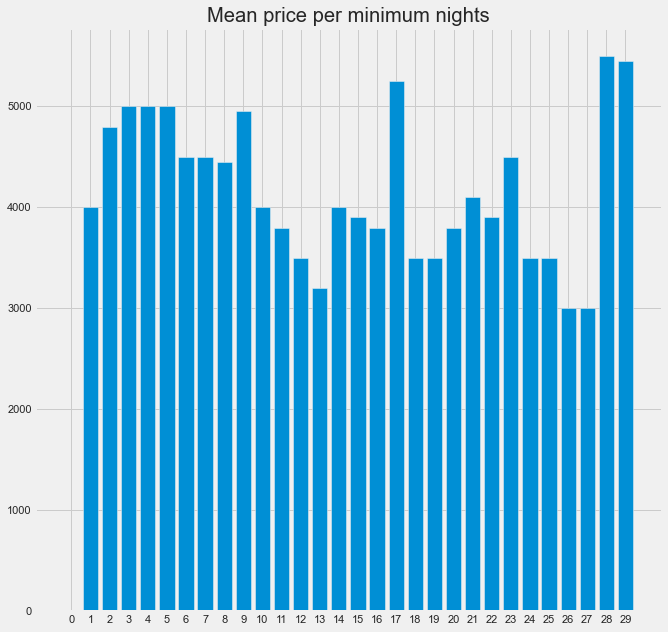

In [73]:
# it can be seen that are a high number of rooms with minimum_nights=0 
# this can be due to, at the time the data was gathered, the rooms were not available or it is bad data
# the normal value is arround 2 and the highest ones tends to be about 26

# distribution of minimum_nights and mean price

d = airbnb_listings[airbnb_listings['minimum_nights'] < 30].groupby('minimum_nights')['price'].median()

fig = plt.figure(figsize=(10,10))
plt.xticks(np.arange(min(d.keys().tolist()), max(d.keys().tolist())+1, 1.0))
plt.bar(d.keys().tolist(), d.tolist())
plt.title('Mean price per minimum nights')
plt.grid(True)


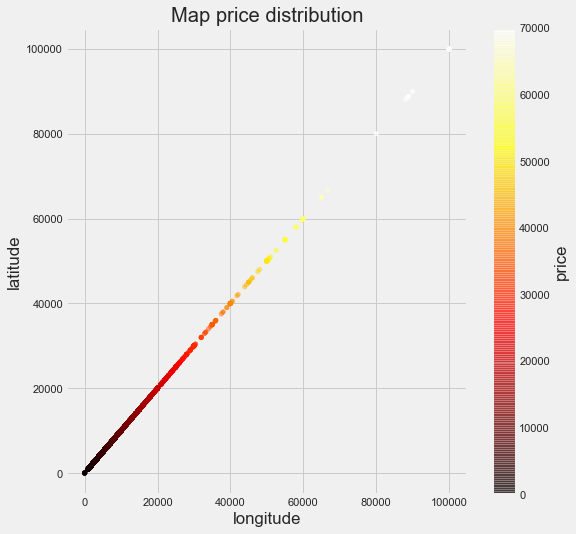

In [74]:
# map distribution using price overall

airbnb_listings.plot.scatter(x='longitude', y='latitude', c='price', figsize=(8,8), cmap='hot', 
                             alpha=0.5, title = 'Map price distribution');



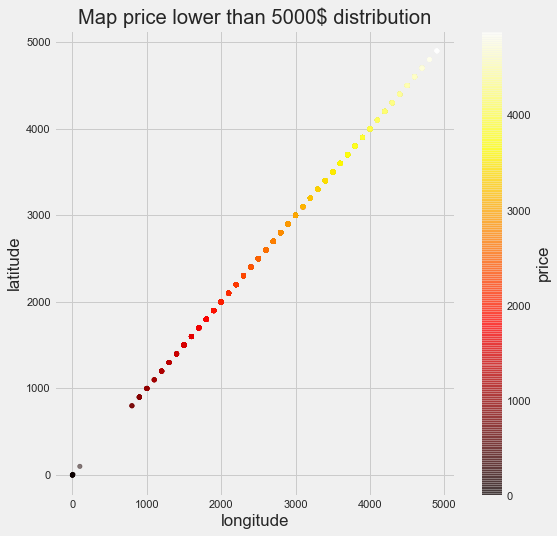

In [75]:
# map distribution using prices lower than 300$, for example

airbnb_listings[airbnb_listings['price']<5000].plot.scatter(x = 'longitude',
                             y = 'latitude',
                             c = 'price',
                             figsize = (8,8),
                             cmap = 'hot',
                             alpha = 0.5,
                             title = 'Map price lower than 5000$ distribution');

# it can be seen that facilities with prices lower than 5000$ can be found in 5000x5000 parameter (latitude x longitude)

<AxesSubplot:title={'center':'Correlation Between Different Variables'}>

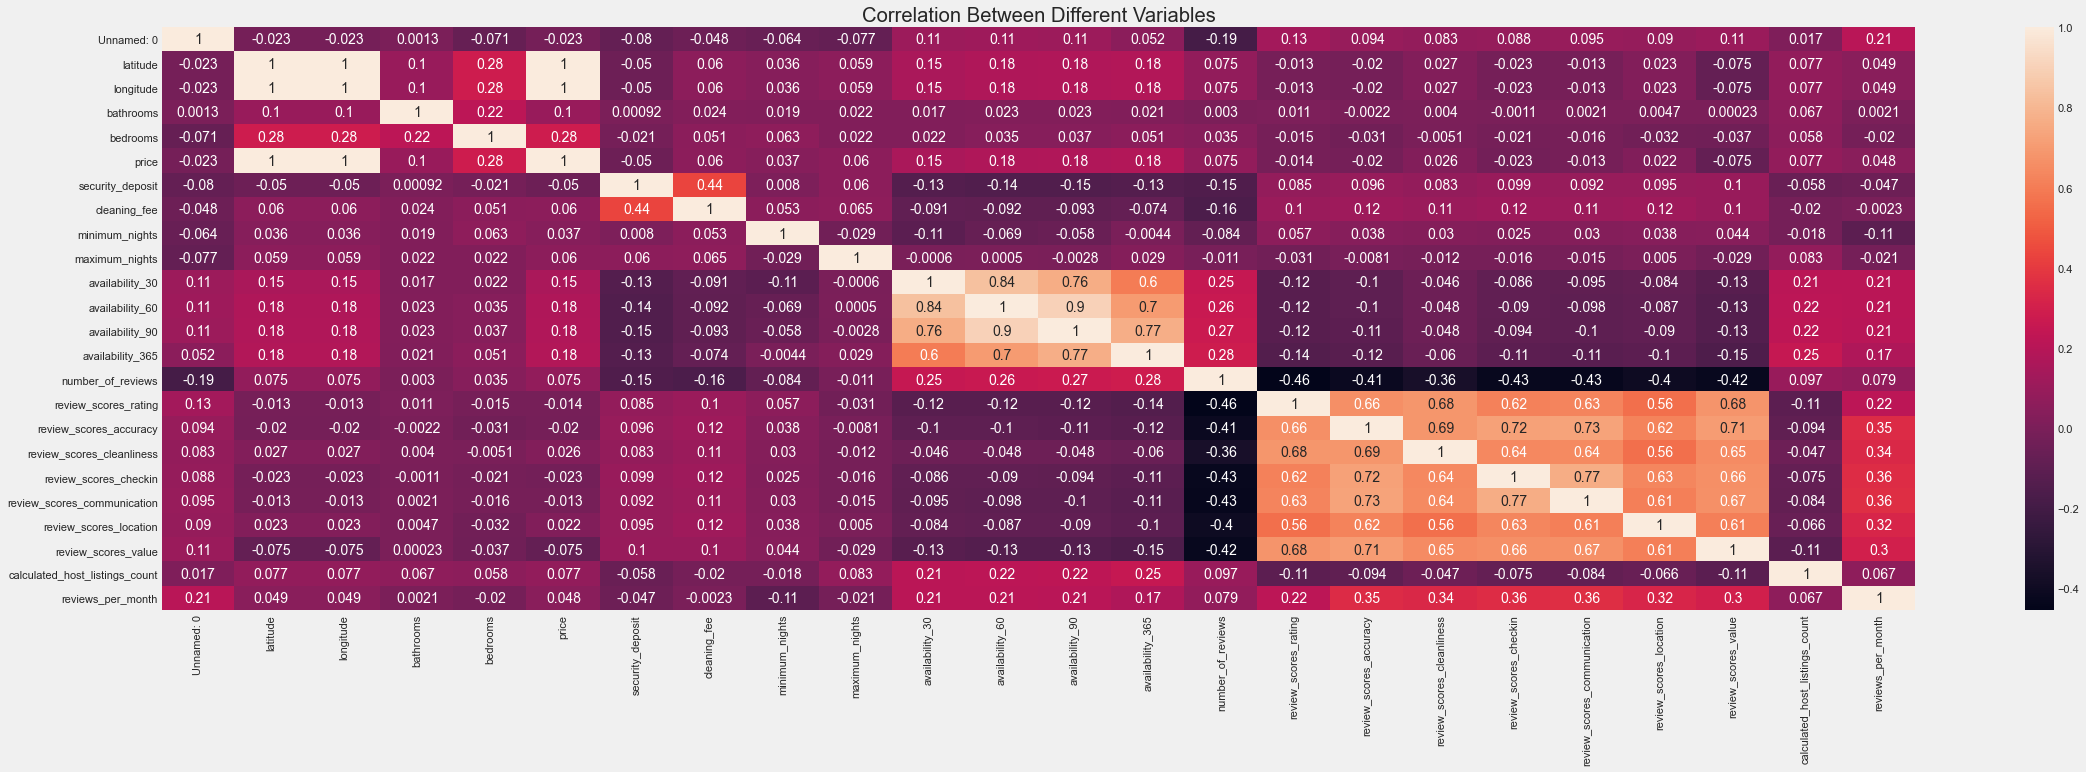

In [76]:
# exploration toward fitting predictive model
# find 5 potentially most informative variables for predicting price
# find 2 variables least informative for predicting price
# multicolinearity

corr = airbnb_listings.corr(method='kendall')
plt.figure(figsize=(35,10))
plt.title("Correlation Between Different Variables")
sns.heatmap(corr, annot=True)

In [77]:
# from the graph it can be seen that 5 most informative variables for price prediction are bedrooms, availability_30, 
# availability_60, availability_90 and availability_365

# from the graph it can be seen that 2 least informative variables for price prediction are review_scores_value and 
# security_deposit

# FITTING PREDICTIVE MODEL: TASK PART 3

# since data is mostly normally distributed, the best solution in this case is to use the Linear Regression as the
# fitting predictive model to predict the numerical value for the price of a listing using the basic machine learning model 
# from scikit learn

In [78]:
airbnb_listings.info

# deleting data unnecesary for Linear Regression of pice

del airbnb_listings['host_id']
del airbnb_listings['is_business_travel_ready']
del airbnb_listings['host_identity_verified']
del airbnb_listings['instant_bookable']
del airbnb_listings['neighbourhood_group_cleansed']
del airbnb_listings['host_is_superhost']
del airbnb_listings['cancellation_policy']
del airbnb_listings['name']
del airbnb_listings['host_response_time']
del airbnb_listings['host_response_rate']
del airbnb_listings['latitude']
del airbnb_listings['longitude']
del airbnb_listings['property_type']
del airbnb_listings['room_type']
del airbnb_listings['city']
del airbnb_listings['market']

KeyError: 'property type'

In [79]:
airbnb_listings.info  # checking results

<bound method DataFrame.info of        Unnamed: 0    city zipcode  market   property_type        room_type  \
0             0.0  Berlin   10119  Berlin      Guesthouse  Entire home/apt   
1             1.0  Berlin   10437  Berlin       Apartment     Private room   
2             2.0  Berlin   10405  Berlin       Apartment  Entire home/apt   
3             3.0  Berlin   10777  Berlin       Apartment     Private room   
4             4.0  Berlin   10437  Berlin       Apartment     Private room   
...           ...     ...     ...     ...             ...              ...   
22550     22547.0  Berlin   10119  Berlin       Apartment  Entire home/apt   
22551     22548.0  Berlin   10777  Berlin       Apartment      Shared room   
22552     22549.0  Berlin   10119  Berlin            Loft  Entire home/apt   
22553     22550.0  Berlin   10117  Berlin  Boutique hotel     Private room   
22554     22551.0  Berlin   12049  Berlin       Apartment     Private room   

      accommodates  bathrooms  

In [80]:
# one-hot encoding

airbnb_listings = pd.get_dummies(airbnb_listings)
airbnb_listings.head()

,Unnamed: 0,bathrooms,bedrooms,price,security_deposit,cleaning_fee,minimum_nights,maximum_nights,availability_30,availability_60,...,beds_5,beds_6,beds_7,beds_8,beds_9,beds_yesterday,has_availability_0,has_availability_10,has_availability_8,has_availability_t
0,0.0,1.0,1.0,6000.0,52,29,4.0,1125.0,0.0,21.0,...,0,0,0,0,0,0,0,0,0,1
1,1.0,1.0,1.0,1700.0,0,0,2.0,40.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,2.0,1.0,1.0,9000.0,52,49,62.0,1125.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,3.0,1.0,1.0,2600.0,63,29,5.0,360.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,4.0,1.0,1.0,4200.0,0,0,2.0,10.0,15.0,26.0,...,0,0,0,0,0,0,0,0,0,1


In [81]:
X = airbnb_listings.copy().drop('price', axis = 1)
y = airbnb_listings['price'].copy()

# splitting data in training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [82]:
# scaling data

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [83]:
# doing the regression

lr = LinearRegression()
l1_ratios = [0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9]


for model, name in zip([lr], ['LinearRegression']):
    model.fit(X_train_scaled, y_train)
    y_pred_train = model.predict(X_train_scaled)
    
    mrse_train = np.sqrt(mean_squared_error(y_pred=y_pred_train, y_true=y_train))
    y_pred = model.predict(X_test_scaled)
    
    mrse_test = np.sqrt(mean_squared_error(y_pred=y_pred, y_true=y_test))
    best_alpha = ''
 
    print(name + ' train: ' + str(mrse_train) + ', test: ' + str(mrse_test) + best_alpha + best_l1)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [85]:
# visualization

y_pred_train = model.predict(X_train_scaled)
diff = y_train - y_pred_train

plt.figure(figsize=(12,10))
plt.scatter(np.arange(len(diff)), diff, label = 'residuals')
plt.legend()

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.